# Glass Identification Project

### Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. 
The dataset was credited to Vina Spiehler in 1987. 
The study of classification of types of glass was motivated by criminological investigation. 
At the scene of the crime, the glass left can be used as evidence...
if it is correctly identified!


The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)


	1- building_windows_float_processed
	2- building_windows_non_float_processed
	3- vehicle_windows_float_processed
	4- vehicle_windows_non_float_processed (none in this database)
	5- containers
	6- tableware
	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

#### Predict Type of Glass

### Let's Import majorly required Libraries and Later lets import based on requirements

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Enable Grid Automatically
sns.set_style('darkgrid')

#Set Run time configuration font size =15
plt.rcParams['font.size']=15


#Set Run time configuration figure size = (15,8)
plt.rcParams['figure.figsize']=(15,8)

#Set Run Time configuration parameters of back ground color in HEX 
plt.rcParams['figure.facecolor']='#D3F8D3'

### Import the Data set

In [3]:
# Lets Import Data set using the link given in the project description and read it to see number of Rows x Columns
glass=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv', header=None)
glass

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
#Lets check head of the DataFrame retrieved using glass.head()
glass.head(6)

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [5]:
#Lets check tail of the DataFrame retrieved using glass.tail()
glass.tail()

,0,1,2,3,4,5,6,7,8,9,10
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


For the Model Building and finding issues with the data set at various locations and phases we need to do Exploratory Data Analysis (EDA). For that First, Let's start with Non-Graphical Analysis

## Exploratory Data Analysis (EDA)

### Non-Graphical Analysis

In [6]:
#Let's check the dimensions of the data set using shape 
glass.shape

(214, 11)

The Dataset contains 214 rows and 11 columns containing various values corresponding to the data

In [7]:
#Let's check the names of the Columns for later usage
glass.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

for easier identification and process lets change the co;omn names to alphabetical mode

#### Modifying the names of the columns as per the description

In [8]:
#Modifying the names of the columns as per the description
names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_Glass']
glass.columns = names
glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [9]:
#Now Let's check the names of the Columns for with modified details
glass.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type_Glass'],
      dtype='object')

In [10]:
#checking the dimensions of the internet 
glass.columns.tolist()

['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_Glass']

now lets bring all the column names into single list

In [11]:
#Let's check the data types of the columns
glass.dtypes

Id              int64
RI            float64
Na            float64
Mg            float64
Al            float64
Si            float64
K             float64
Ca            float64
Ba            float64
Fe            float64
Type_Glass      int64
dtype: object

Because they list the ID number and Glass Type, we can see that the two columns with the INT64 data types are ID and Glass Type. However, the values for the remaining chemical component combinations are all FLOAT64 Data types. While the ID column can be disregarded or dropped because it only supports serial numbers as information,

### Checking the Null Values

In [12]:
#Checking the Null Values
glass.isnull().sum()

Id            0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
Type_Glass    0
dtype: int64

there are no null values in any of the columns.
which could be confirmed by  the same by using total count of null values

In [13]:
#Check the Sum of NULL Values in the total DataFrame
glass.isnull().sum().sum()

0

It's very clear that there are no Null values in any of the columns or totally within the data set.

#### Get the Complete Information about Dataset

In [14]:
#Fetching the information about the DataFrame with Non Null Values and Data Type of the Column
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          214 non-null    int64  
 1   RI          214 non-null    float64
 2   Na          214 non-null    float64
 3   Mg          214 non-null    float64
 4   Al          214 non-null    float64
 5   Si          214 non-null    float64
 6   K           214 non-null    float64
 7   Ca          214 non-null    float64
 8   Ba          214 non-null    float64
 9   Fe          214 non-null    float64
 10  Type_Glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


This is a quick and easy approach to review what we already looked at about the information and NULL values before.

As we can see, 2 of the feature columns are integers and there are 9 columns that are floats. In addition to the goal variable (Type of the Glass), the dataset contains 214 values and 10 characteristics. About 18.5+ KB of memory are used.


<AxesSubplot:>

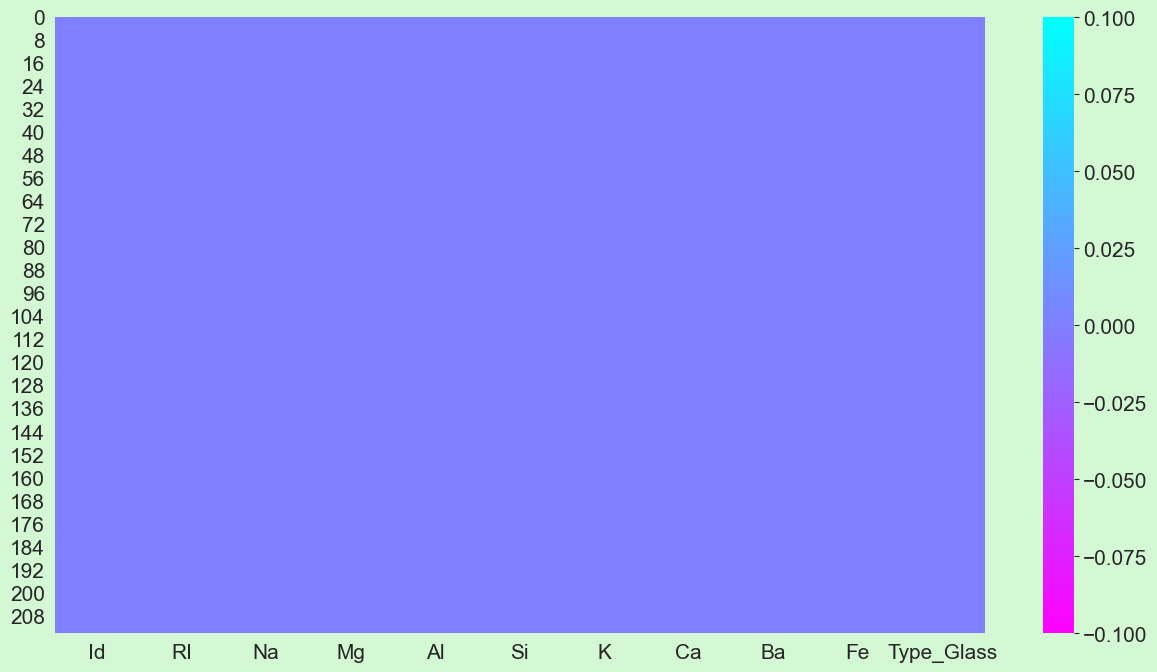

In [15]:
#Let's see the confirmation of No NULL Values with a heatmap
sns.heatmap(glass.isnull(), cmap='cool_r')

Additionally, the Heatmap makes it abundantly evident that the provided data set has no NULL Values. Therefore, there is no requirement for replacement or any other issues with handling NULL Value.

###  Let's check the unique values and all the information in each column

In [16]:
#Gives Unique Values
glass['Type_Glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

Our target variable has 6 different kinds of unique values. It states that there are six different kinds of glass predictions available. We must categorise them depending on a variety of variables.

In [17]:
#Gives Unique Values
glass['Type_Glass'].nunique()

6

We can again conclude that there are totally 6 different classes are available within the Target variable

In [18]:
#Checking the value counts of each Column
for i in glass.columns:
    print(glass[i].value_counts())
    print("\n")

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id, Length: 214, dtype: int64


1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
   

We can see that the column ID has all unique values that are just serial numbers, and we can disregard it because it has no bearing on determining the type of glass.

All other chemical elements have various lengths and numerous distinct values. However, each value has a unique correspondence.

The Type_Glass column contains 6 separate, distinct values, with Type 2 having 76 possible permutations and the other types having various lengths.
Compared to other types, type 6 has less distinctive values.

In [19]:
#Let's implement describe to return the description of the data in the DataFrame
gd=glass.describe()
gd

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Since the describe() method returns a description of the data in a dataset, we use it to determine the description of numerical data, which provides the following information in each column.

1) COUNT: All columns have the same counts, demonstrating that no data was lost.

2) MEAN: Right skewness develops when the Mean Value is higher than the Median(50%).

3) Left skewness occurs from a mean that is less than the median.

4) There is a chance of outliers due to the high fluctuation in the mean and 75%, which will be dealt with later.

5) Additional findings include the fact that the describe approach calculates the standard deviation as adjusted sample standard deviation and 25% percentile.

In [20]:
#Lets compare the columns of MEAN and MEDIAN for skew information
gd.iloc[[1,5]]

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Glass
mean,107.5,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
50%,107.5,1.517680,13.30000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000


We know that ID and Type_Glass can be ignored for any analysis since, ID is corrsponding to Serial Number and can be dropped later.

Type of Glass is a target varaiable and no need to find or remove skewness or outliers.

Columns, RI, Na are almost having similar mean and median so we can think of no skewness
in Mg and K mean is less than Median and we can observe it as Left SKewed
other columns showing right skewness.
The same can also be identified by the .skew() method

In [21]:
#Lets compare the columns of MEAN and MEDIAN for skew information
gd.iloc[[1,6]]

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Glass
mean,107.50,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
75%,160.75,1.519157,13.82500,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000


Except in Ba and Fe, all the other columns are not having a large variation between Mean and 75% Values. SO only these 
two columns maybe having Outliers. 
We will check them later and handle it if necessary

### We can also see actually what % of data is missed

In [22]:
# We know there's no null values, but lets see the %
total = glass.isnull().sum().sort_values(ascending=False)
percent_1 = glass.isnull().sum()/glass.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Id,0,0.0
RI,0,0.0
Na,0,0.0
Mg,0,0.0
Al,0,0.0
Si,0,0.0
K,0,0.0
Ca,0,0.0
Ba,0,0.0
Fe,0,0.0


We can once again see the zero NULL Values in the form of Percentage

In [24]:
# recognizing which column is continuous and which is categorical
# Typically if the number of unique values are < 20 then the variable is likely to be a category otherwise continuous
glass.nunique()

Id            214
RI            178
Na            142
Mg             94
Al            118
Si            133
K              65
Ca            143
Ba             34
Fe             32
Type_Glass      6
dtype: int64

With the use of the aforementioned procedure, we can classify all 214 columns' worth of variables as having more varied and distinctive values. Consequently, we may assert that all have numerical data, and we can see this from dtypes as well.

In [25]:
glass = glass.drop('Id',1)

In [26]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Graphical Analysis

1. Univariant Graphical Analysis

In [27]:
# Seprating Class labels and Features

features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['Type_Glass']

X = glass[features]

y = glass[label]

<AxesSubplot:title={'center':'Total Count of Glass Types'}, xlabel='Type_Glass', ylabel='Count'>

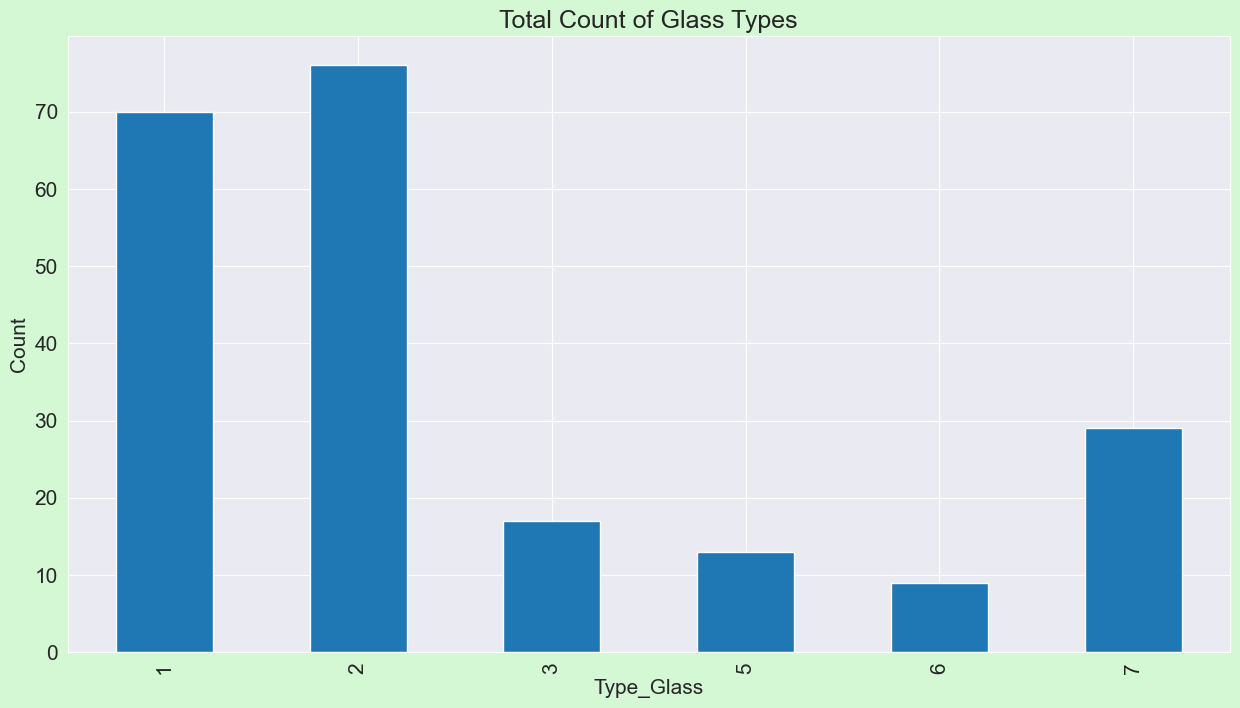

In [28]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
plt.rcParams['figure.figsize']=(15,8)
plt.title('Total Count of Glass Types')
Group_data=glass.groupby('Type_Glass').size()
plt.ylabel('Count')
Group_data.plot(kind='bar')

<AxesSubplot:title={'center':'Total Count of Glass Types'}, xlabel='Type_Glass', ylabel='count'>

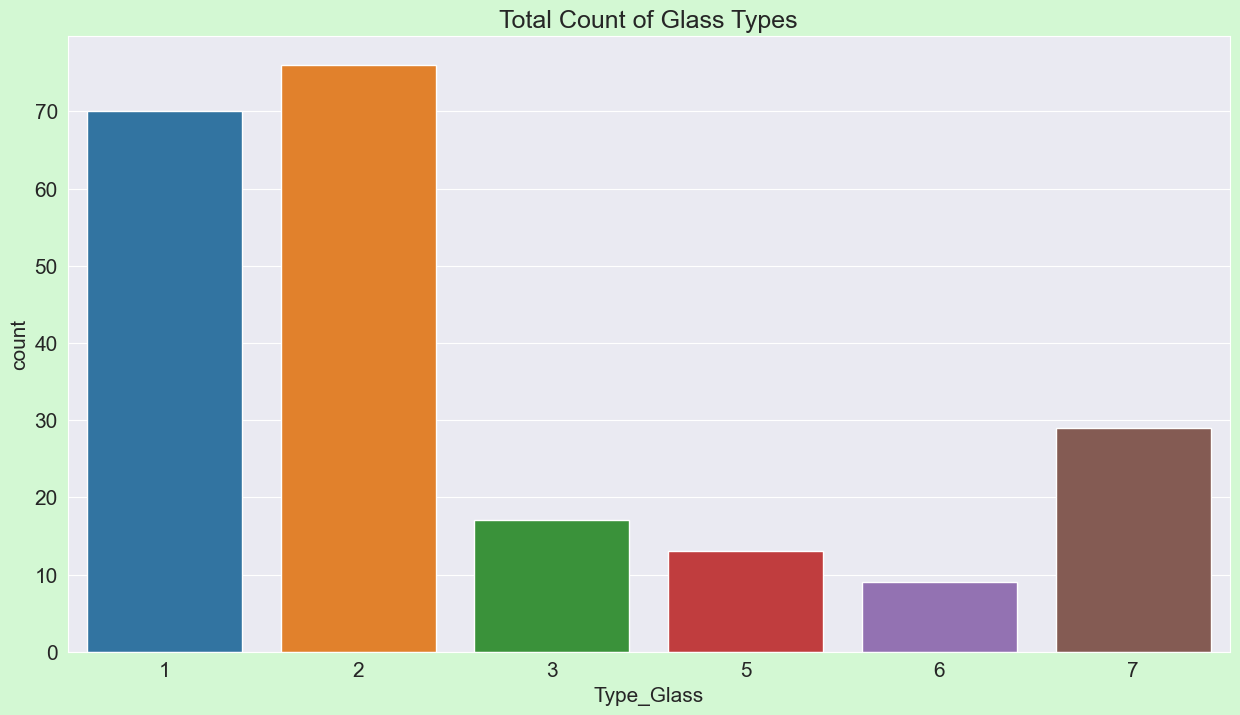

In [29]:
plt.rcParams['figure.figsize']=(15,8)
plt.title('Total Count of Glass Types')
sns.countplot('Type_Glass',data=glass)

In both the BAR and COUNT Plots, we have seen the total number of Glass kinds.

We must make sure that all of the kinds are fairly represented in both the train and test datasets because kinds 2 and 1 are the most prevalent in the dataset.

The source is a dataset from the forensic sciences department, and it is likely that the high proportion of type 1 and type 2 offences stems from the fact that many criminals smash building windows at the site rather than bottles or crockery.

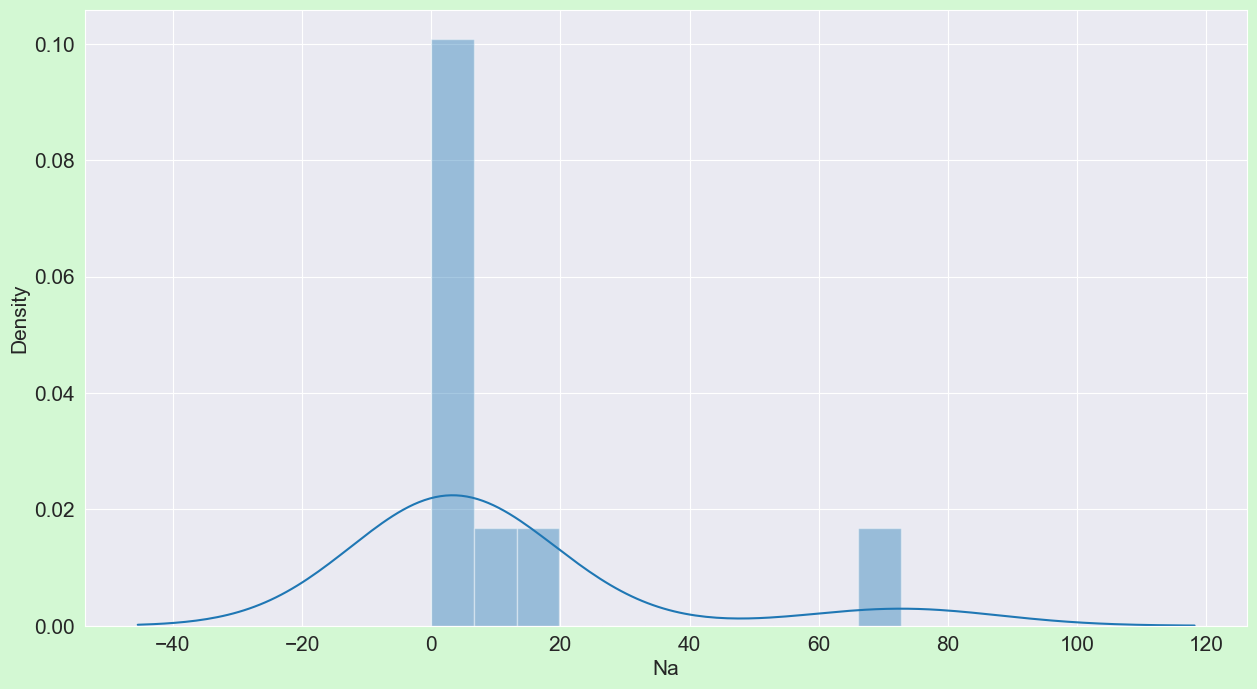

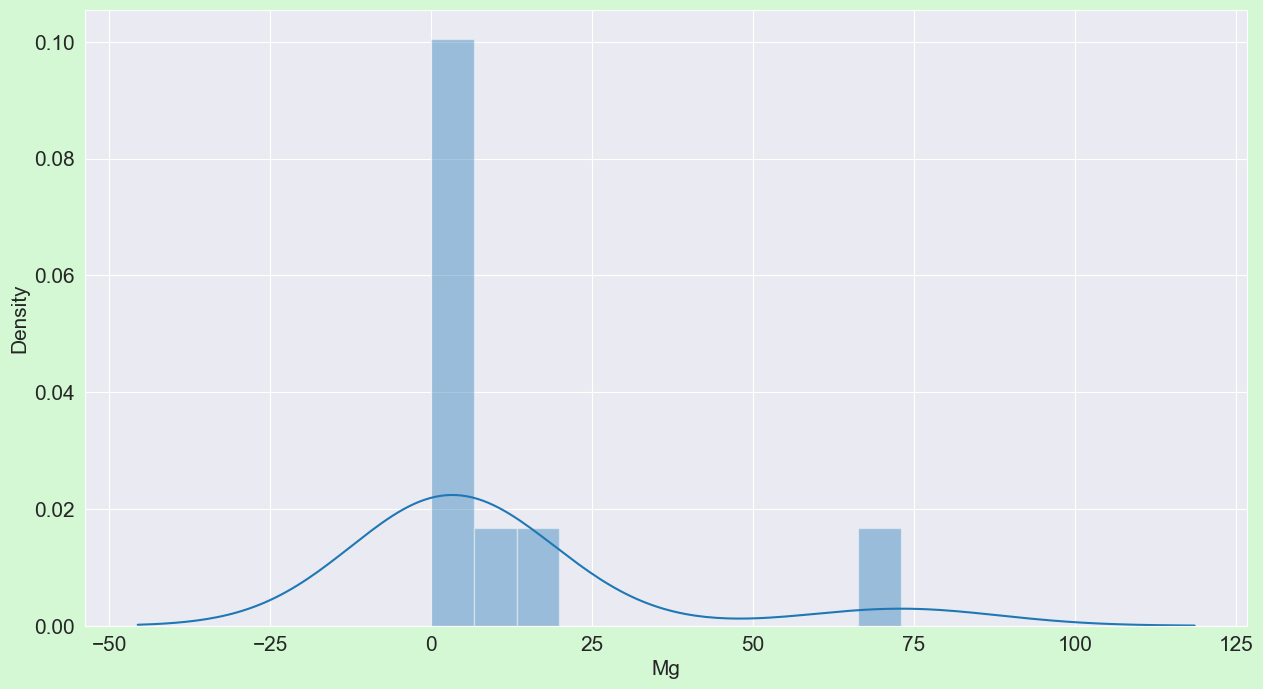

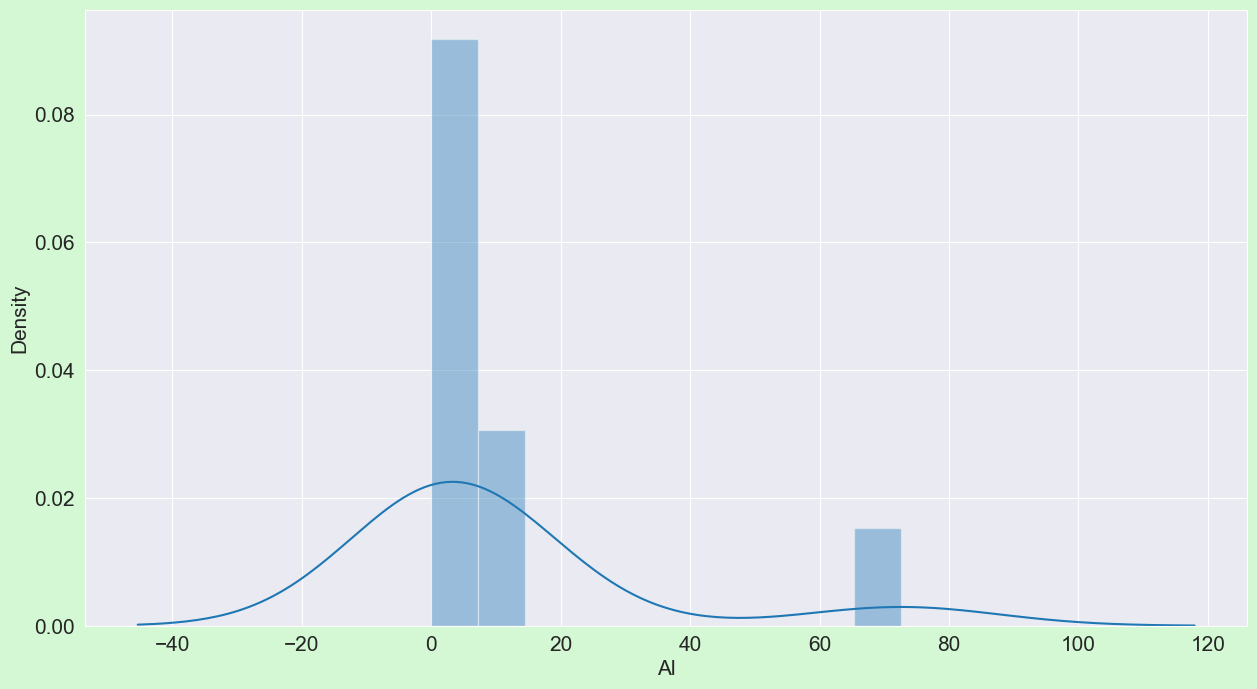

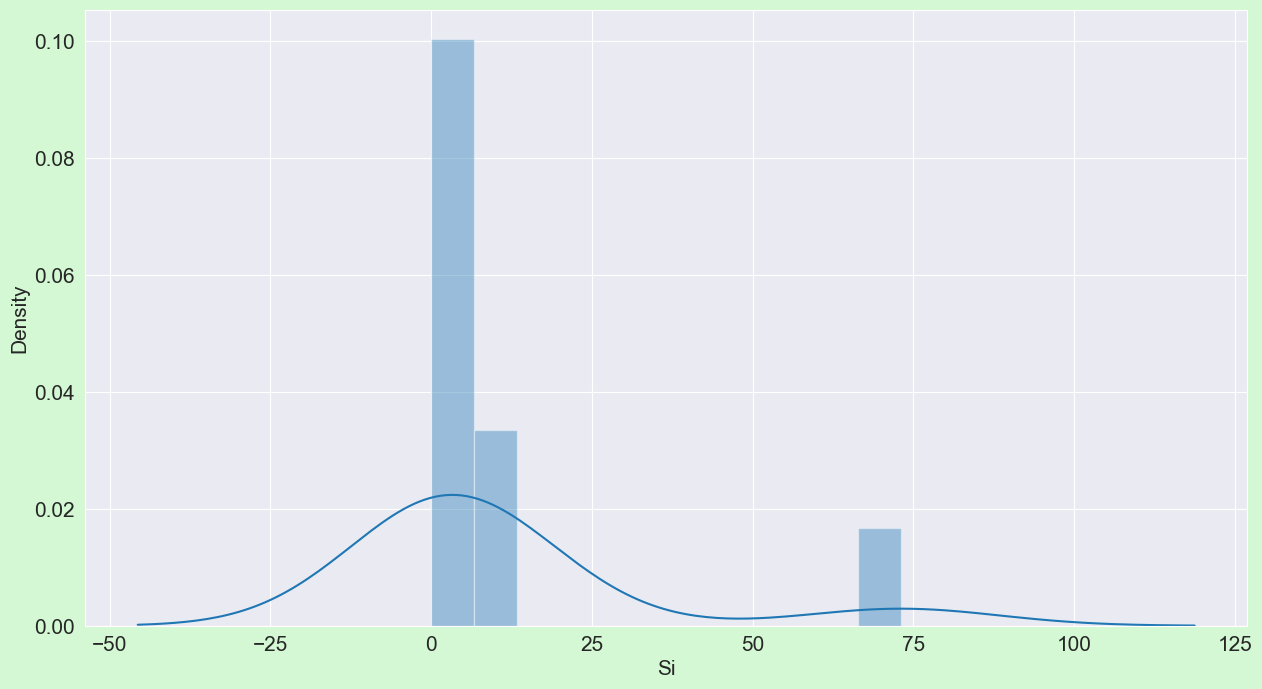

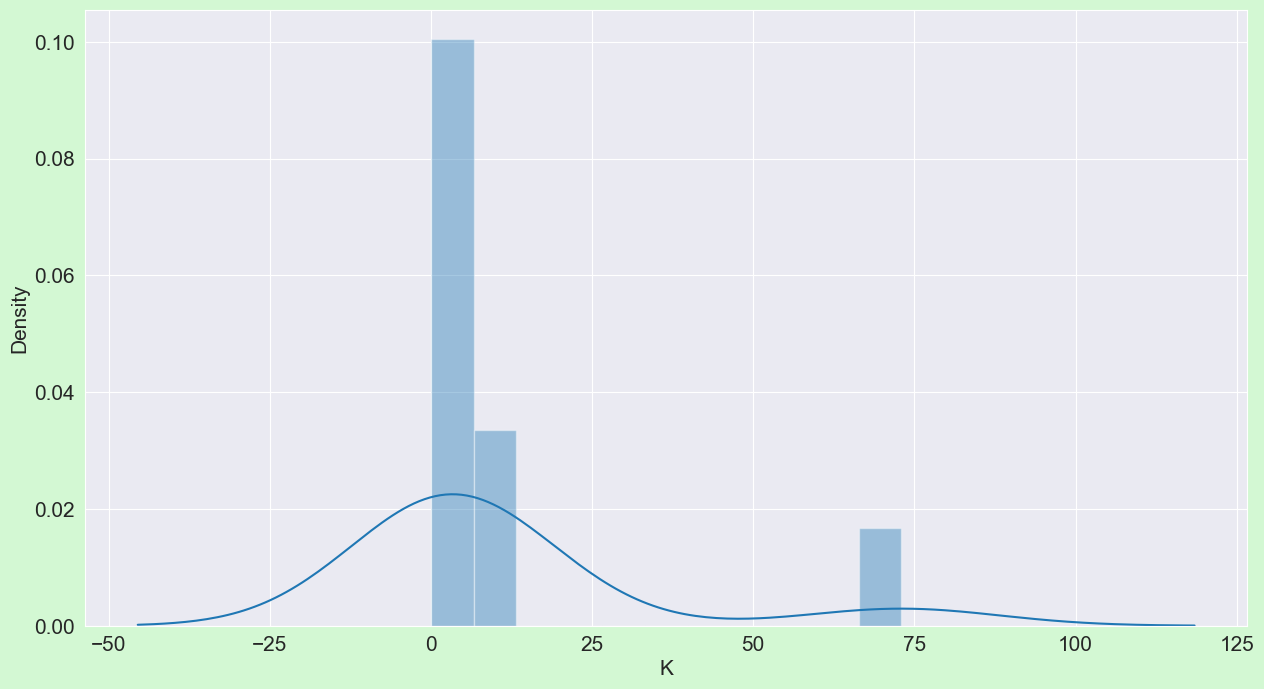

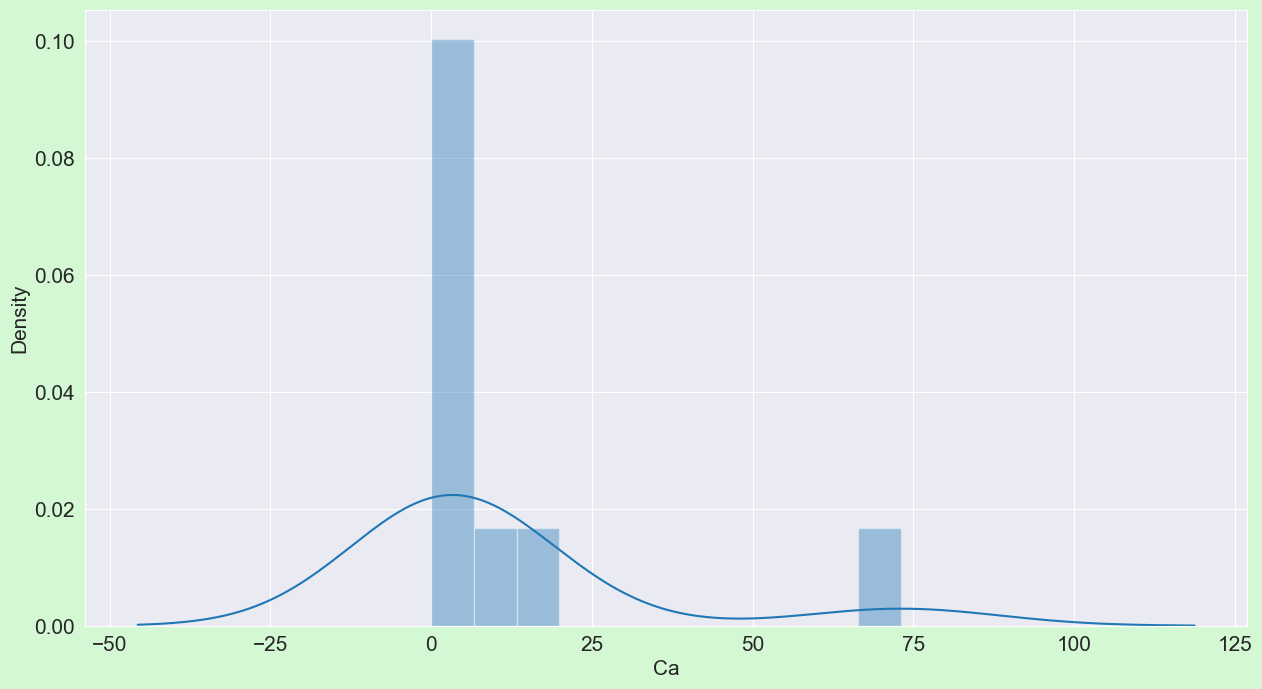

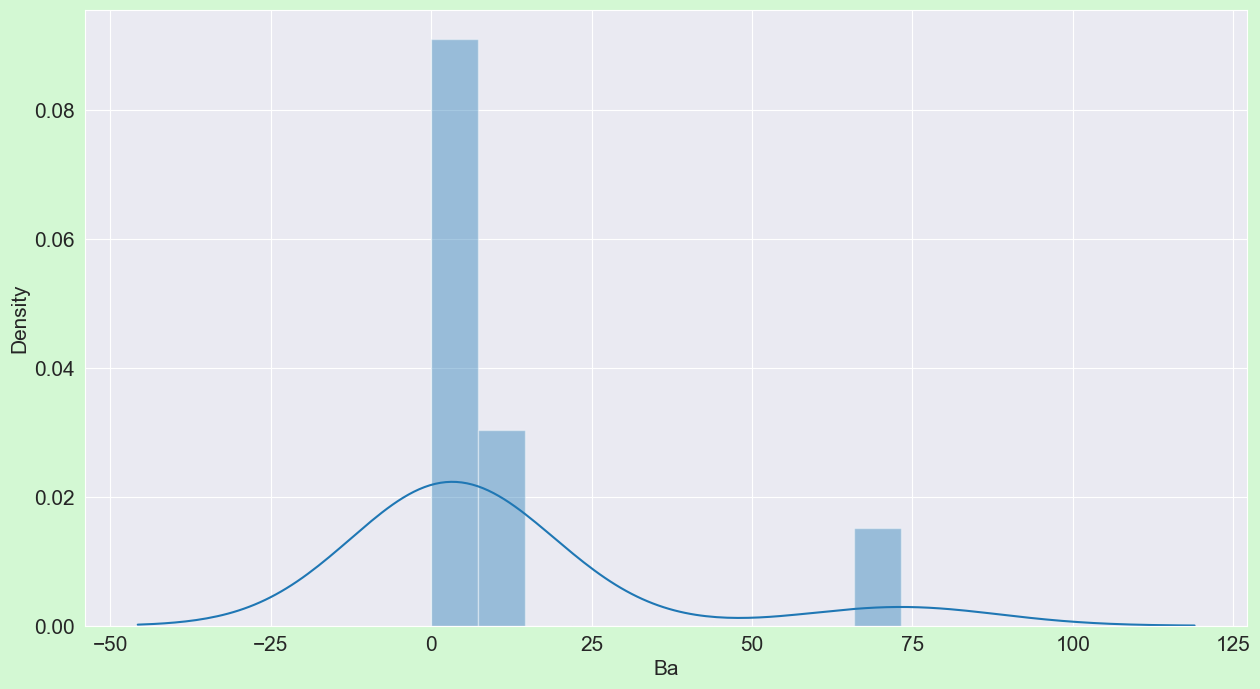

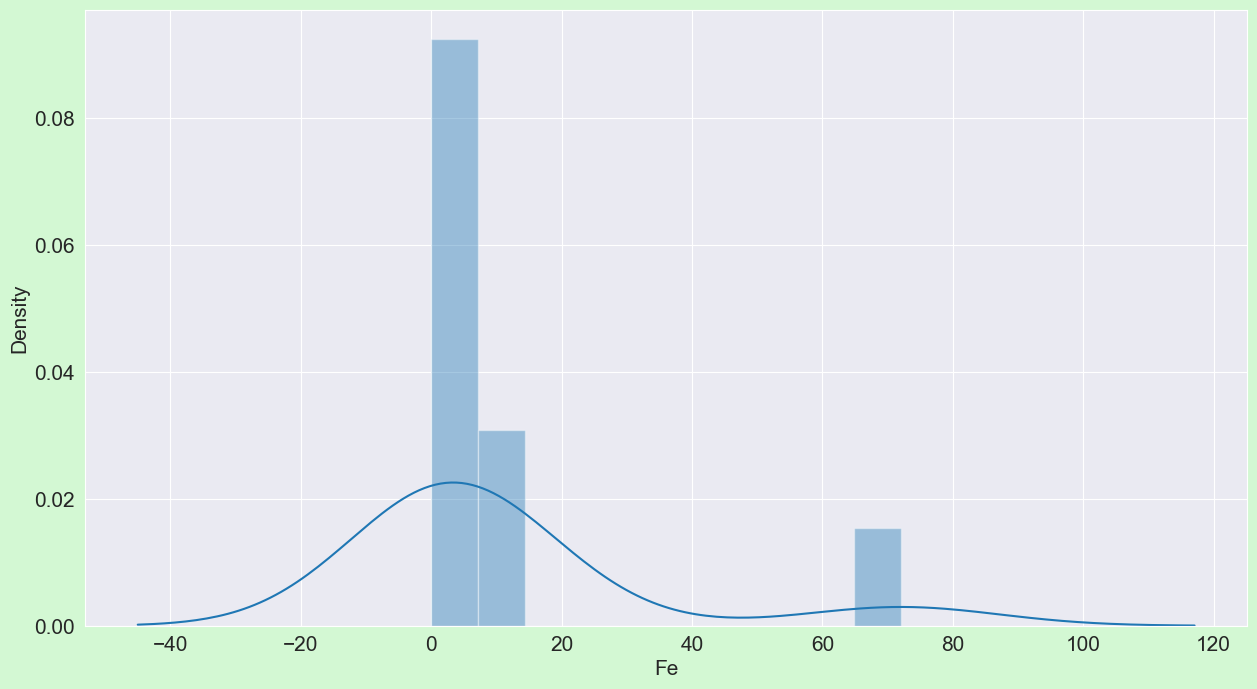

In [30]:
x2 = X.values
from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()

We were easily able to plot the count values in each column as a graphical representation using the aforementioned scatterplot.

Additionally, we may observe that the data in our dataset are not normalised and are skewed either positively or negatively.

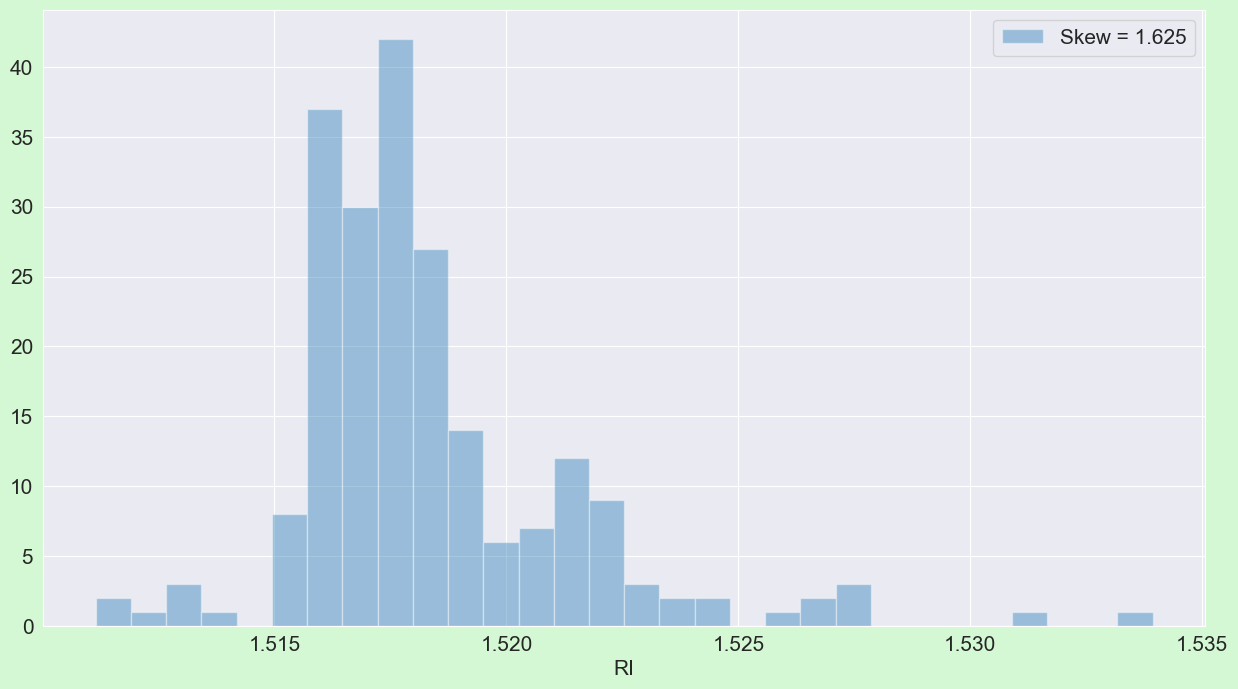

1.6254305060087644


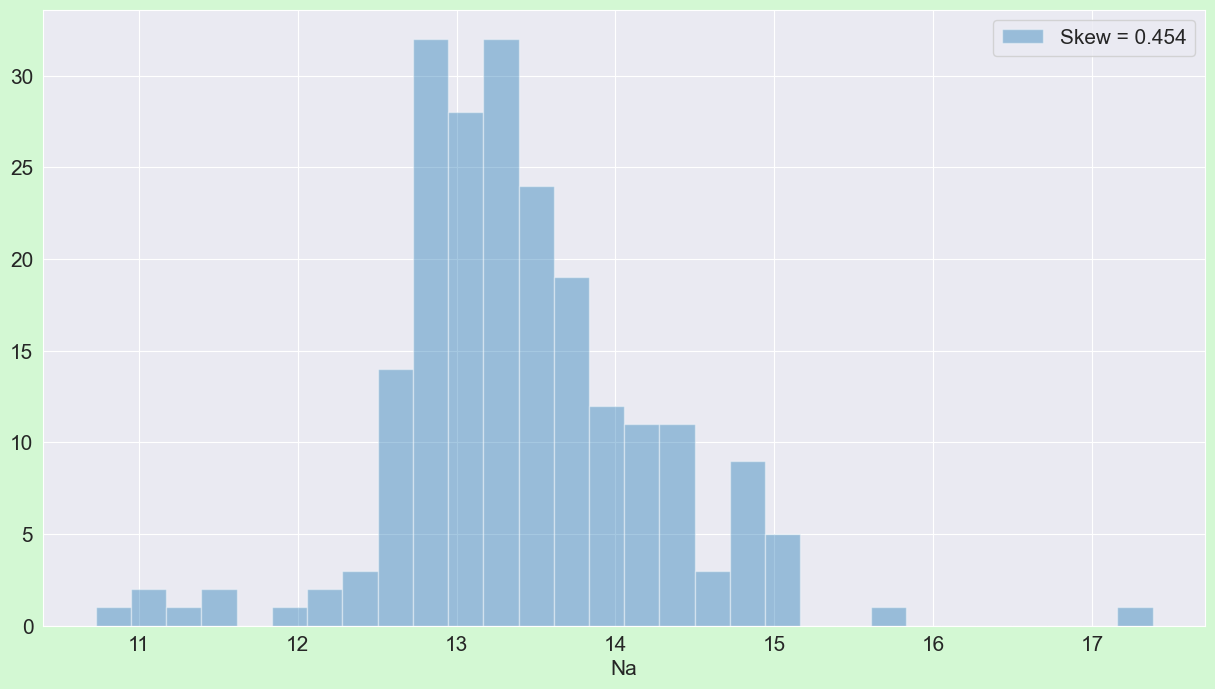

0.4541814536577495


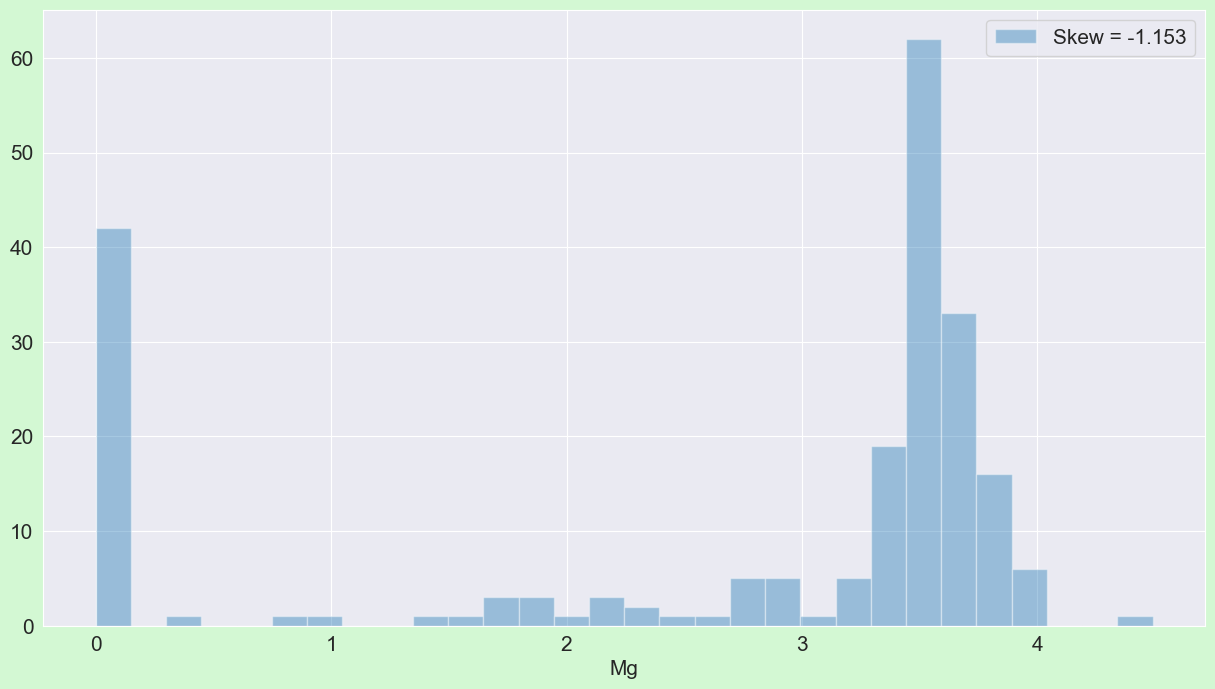

-1.1525593175802356


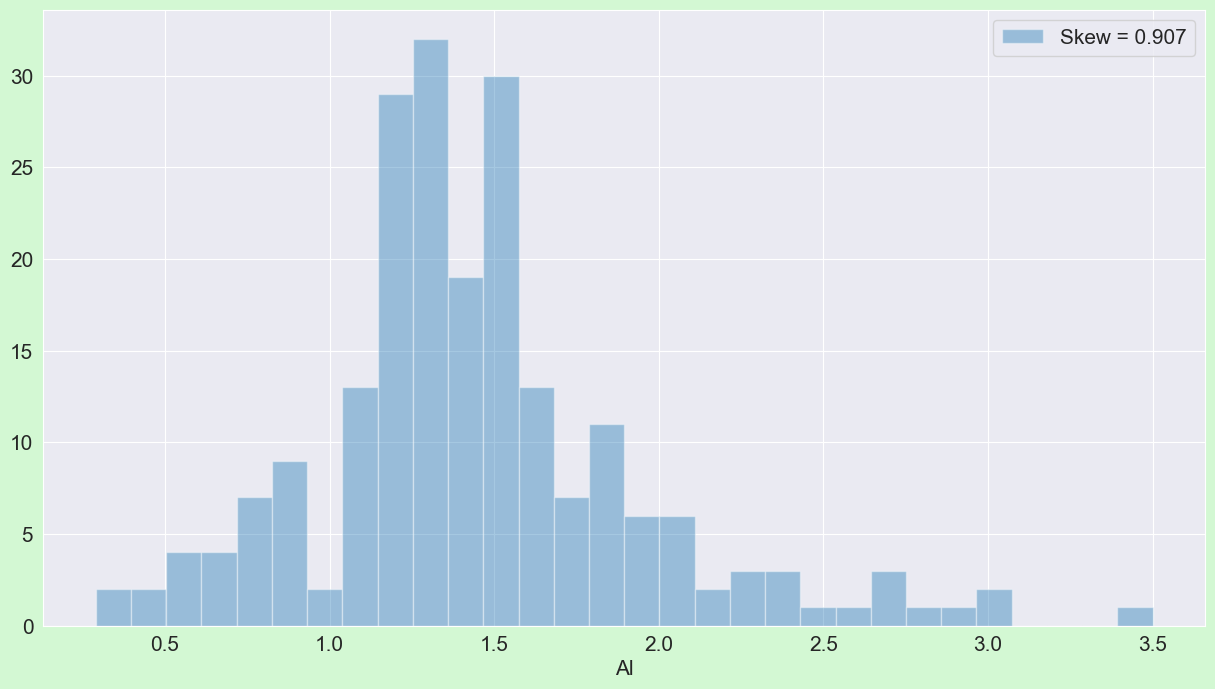

0.9072898090246346


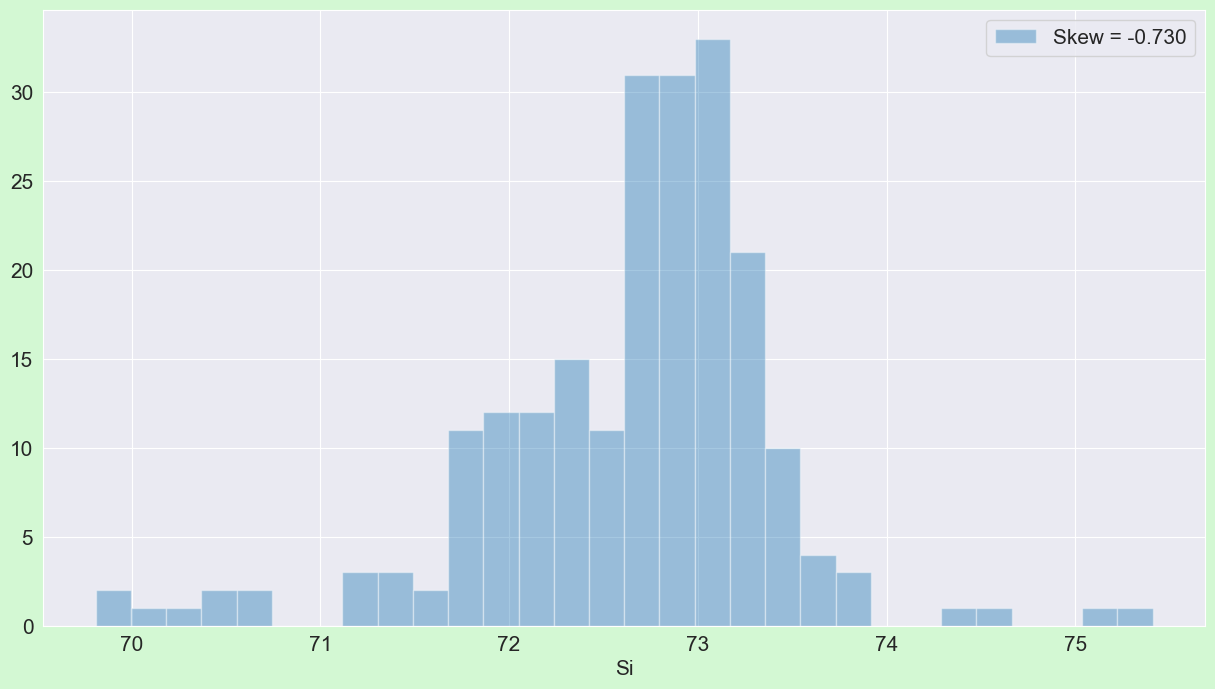

-0.7304472251318588


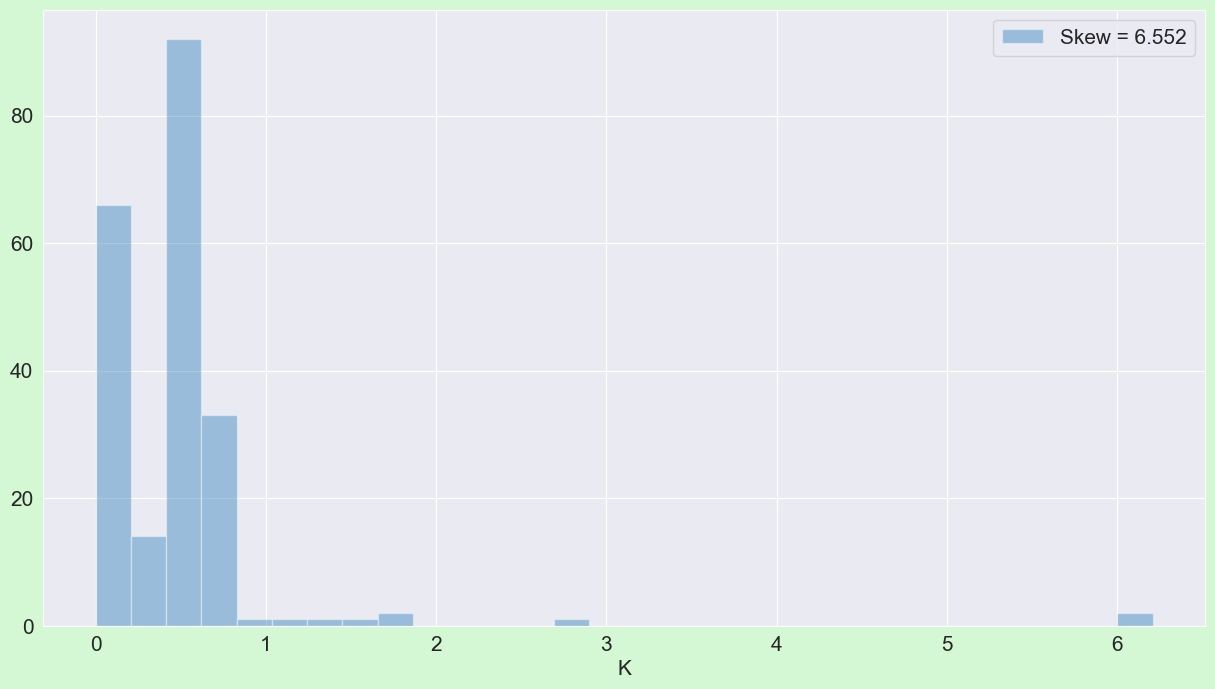

6.55164830960496


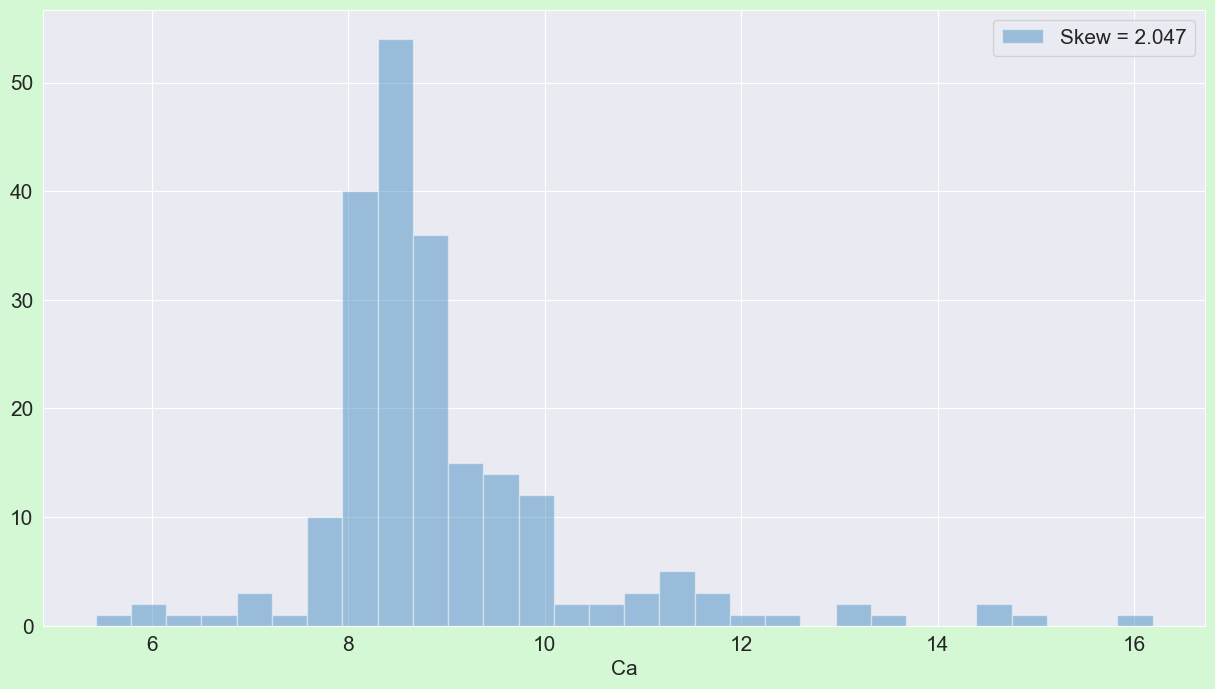

2.0470539131183103


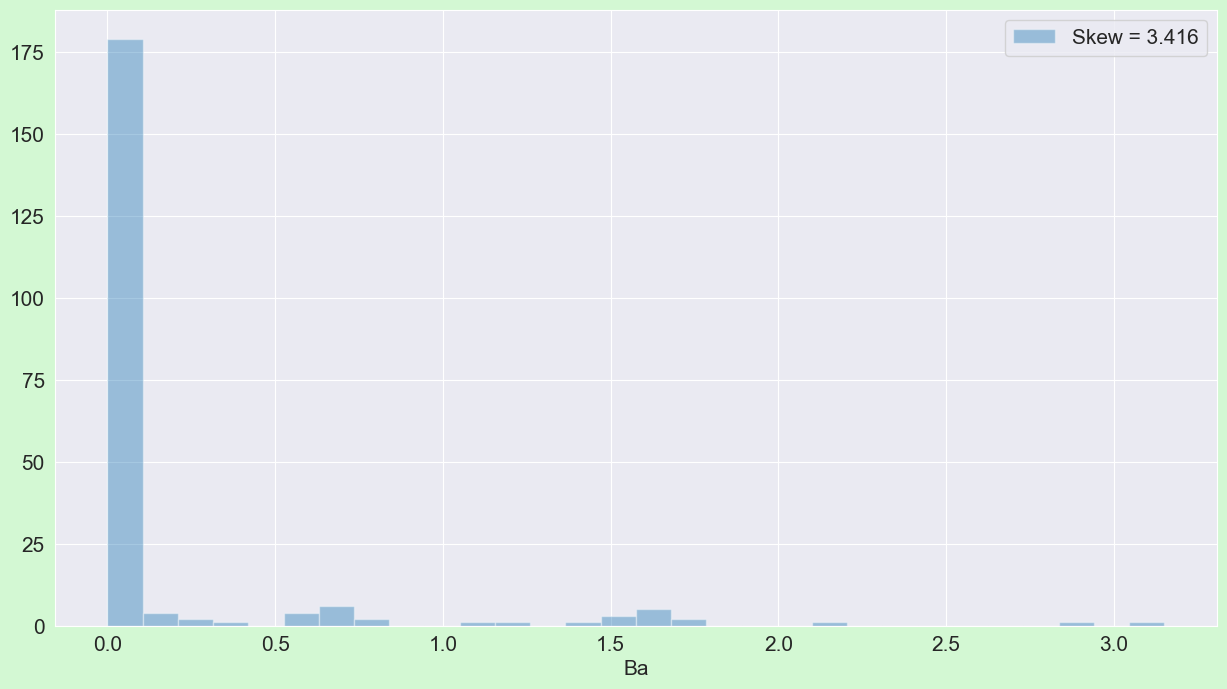

3.4164245693025577


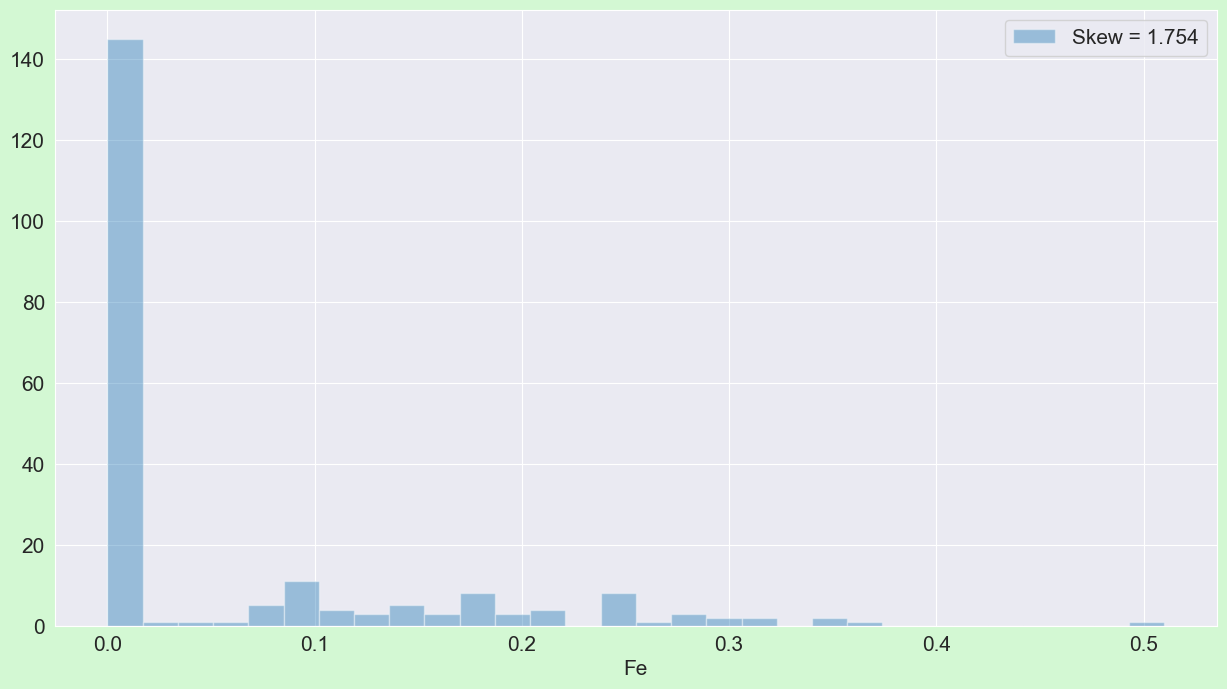

1.754327470435831


In [31]:
#attempting to understand the data more
for i in features:
    skew = glass[i].skew()
    sns.distplot(glass[i], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()
    print(skew)

We can see the evaluated Skew values of our Columns from the above graph and same can be estimated from the skew method also

In [32]:
glass.skew()

RI            1.625431
Na            0.454181
Mg           -1.152559
Al            0.907290
Si           -0.730447
K             6.551648
Ca            2.047054
Ba            3.416425
Fe            1.754327
Type_Glass    1.114915
dtype: float64

Which give a statistiacl values of SKEW what we found in the graphs
1. There appear to be a lot of outliers in the distribution of potassium (K) and barium (Ba).
2. Fe, Ba, Ca, and K have high skew coefficients and are highly skewed features.
3. All of the traits defy normal distribution and are not distributed regularly.

### Multivariant Graphical Analysis

<BarContainer object of 214 artists>

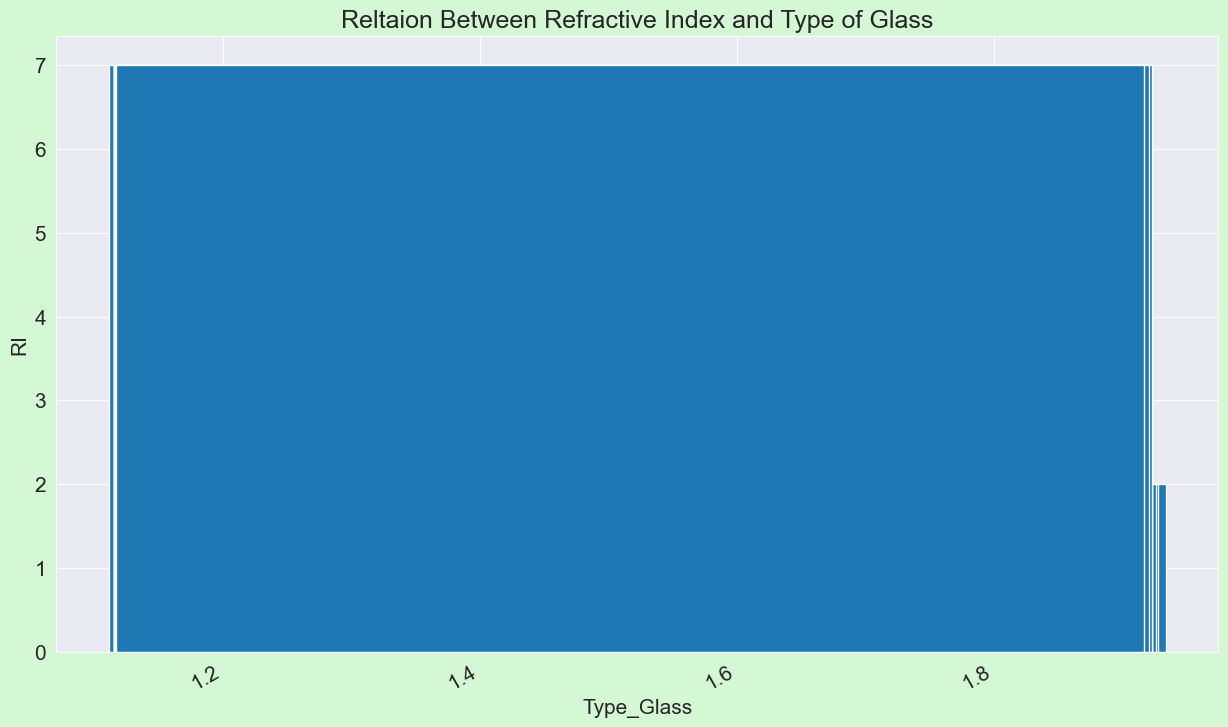

In [33]:
plt.rcParams['figure.figsize']=(15,8)
plt.title('Reltaion Between Refractive Index and Type of Glass')
plt.xlabel('Type_Glass', fontsize='15')
plt.ylabel('RI', fontsize='15')
plt.xticks(rotation =30, ha='right')
plt.bar(glass.RI,glass.Type_Glass)

<Figure size 800x800 with 0 Axes>

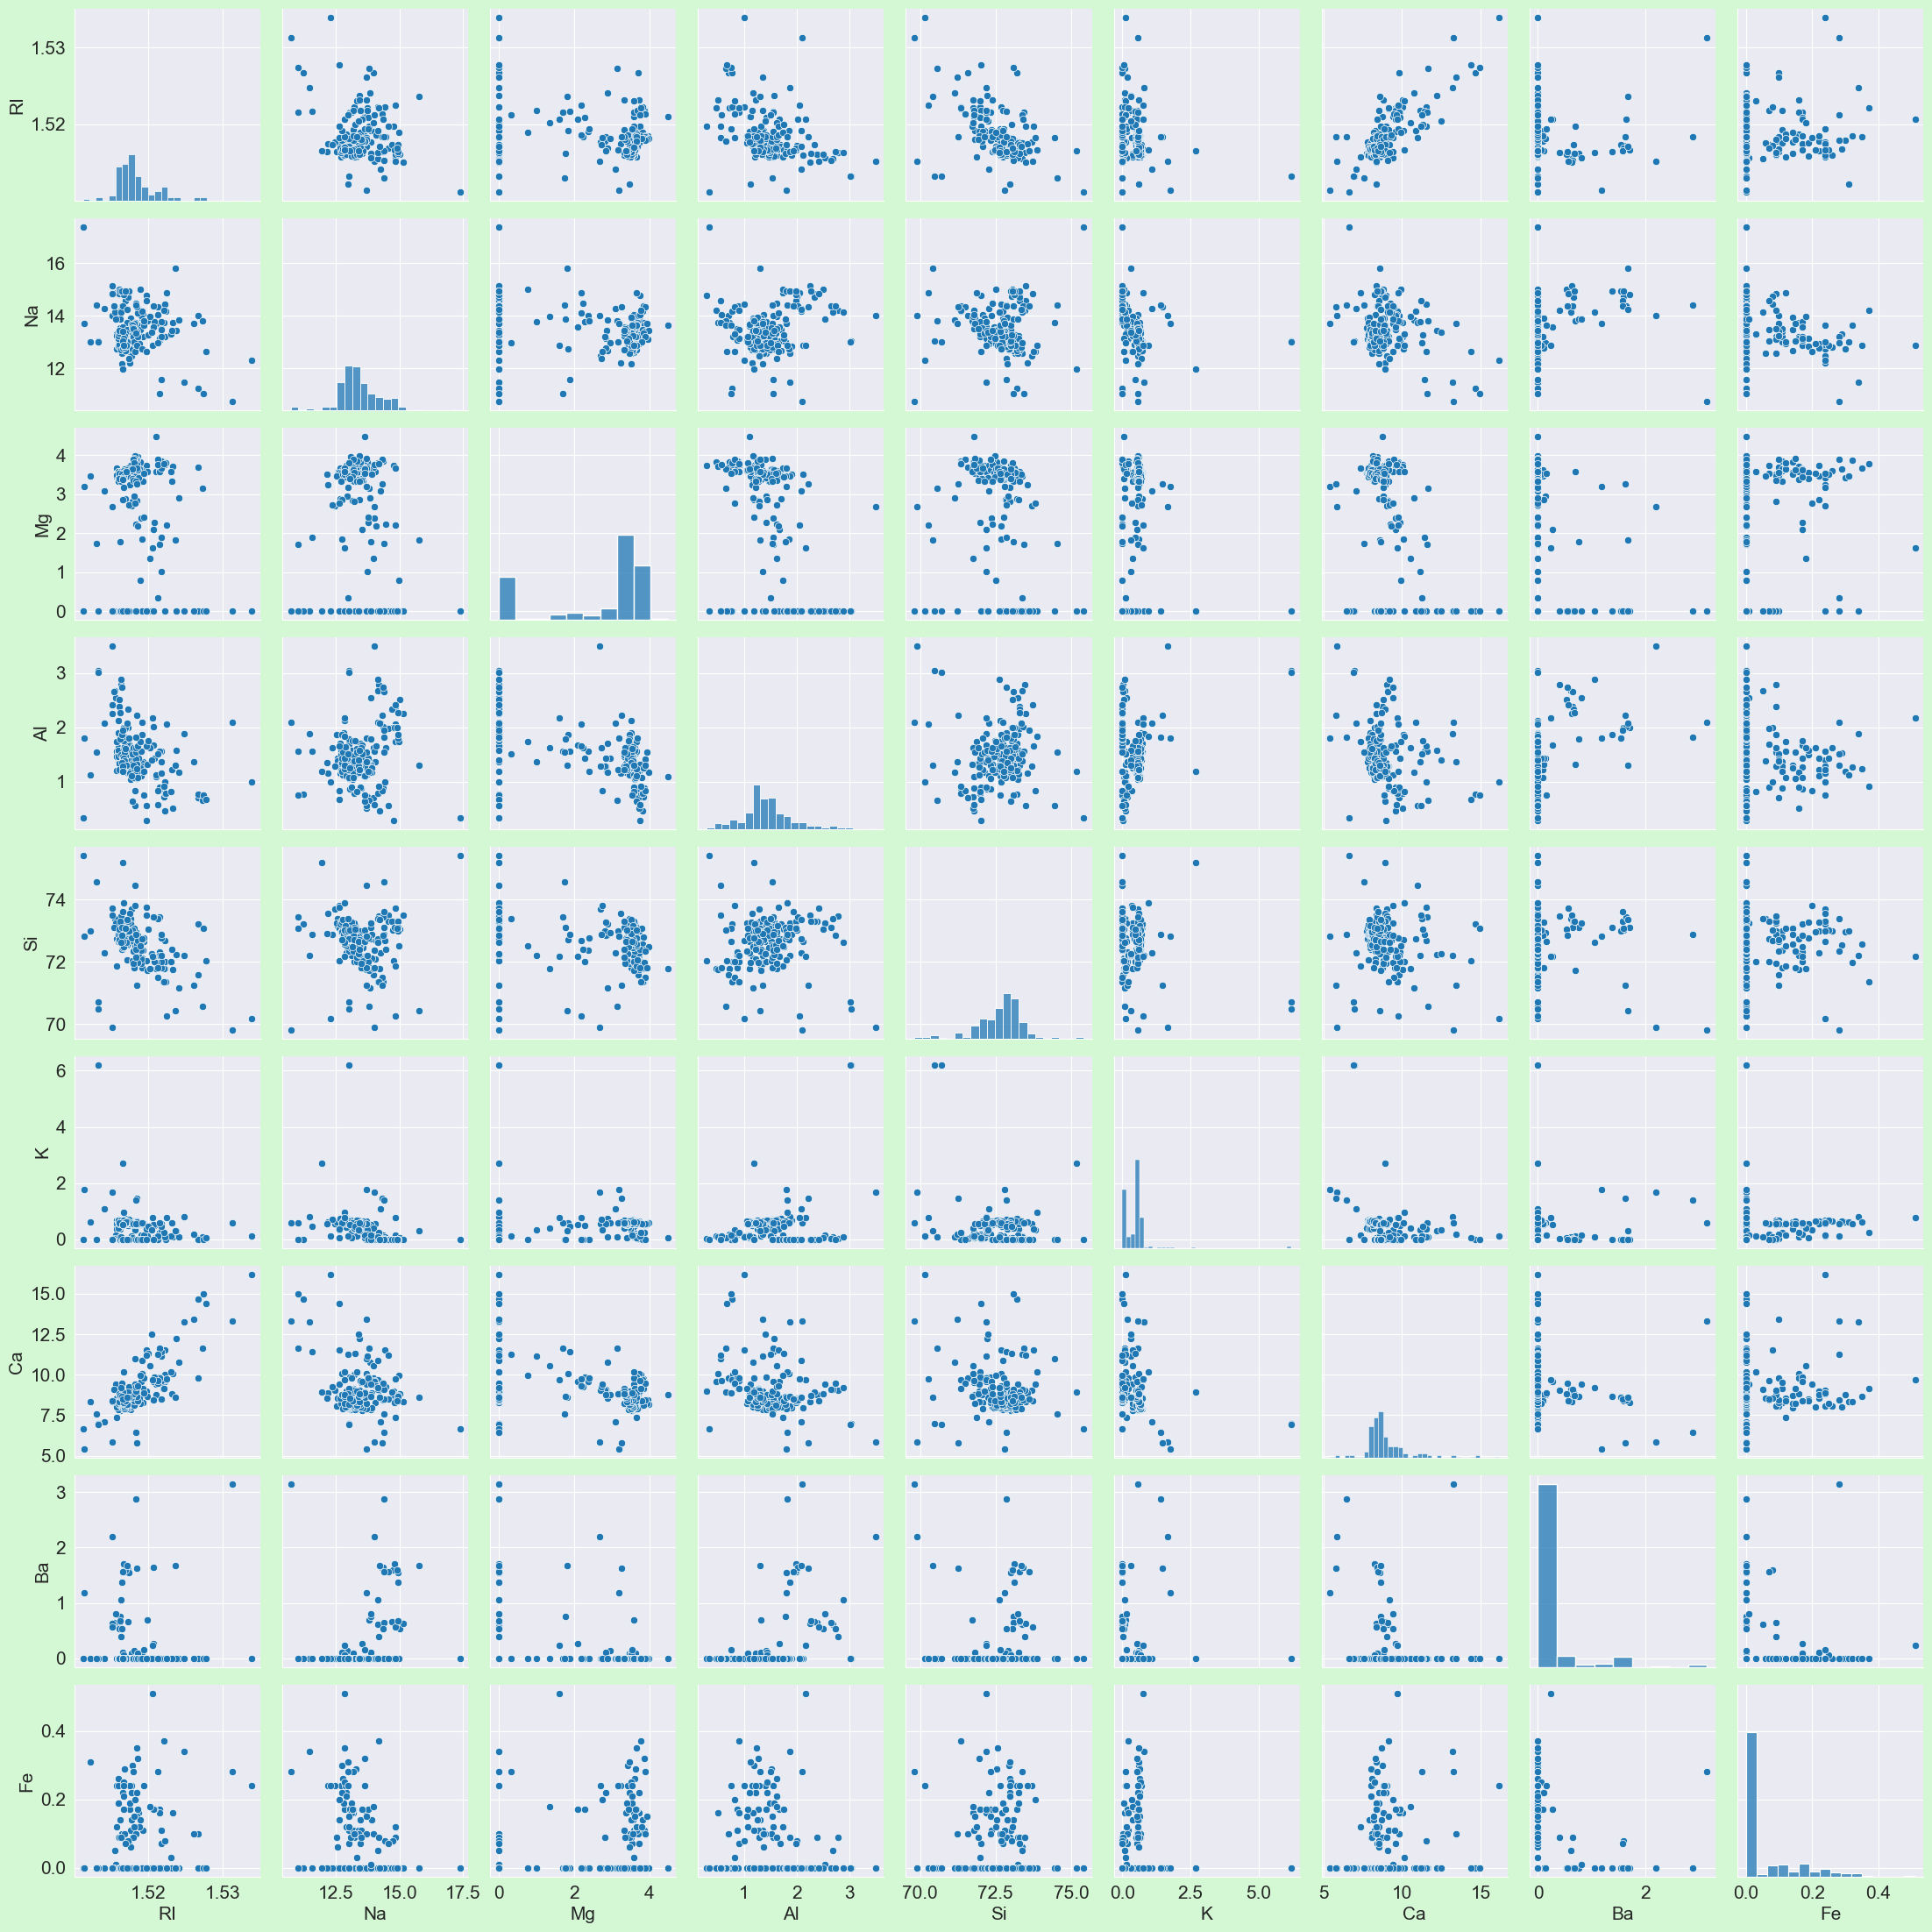

In [34]:
x2 = pd.DataFrame(X)

plt.figure(figsize=(8,8))
sns.pairplot(data=x2)
plt.show()

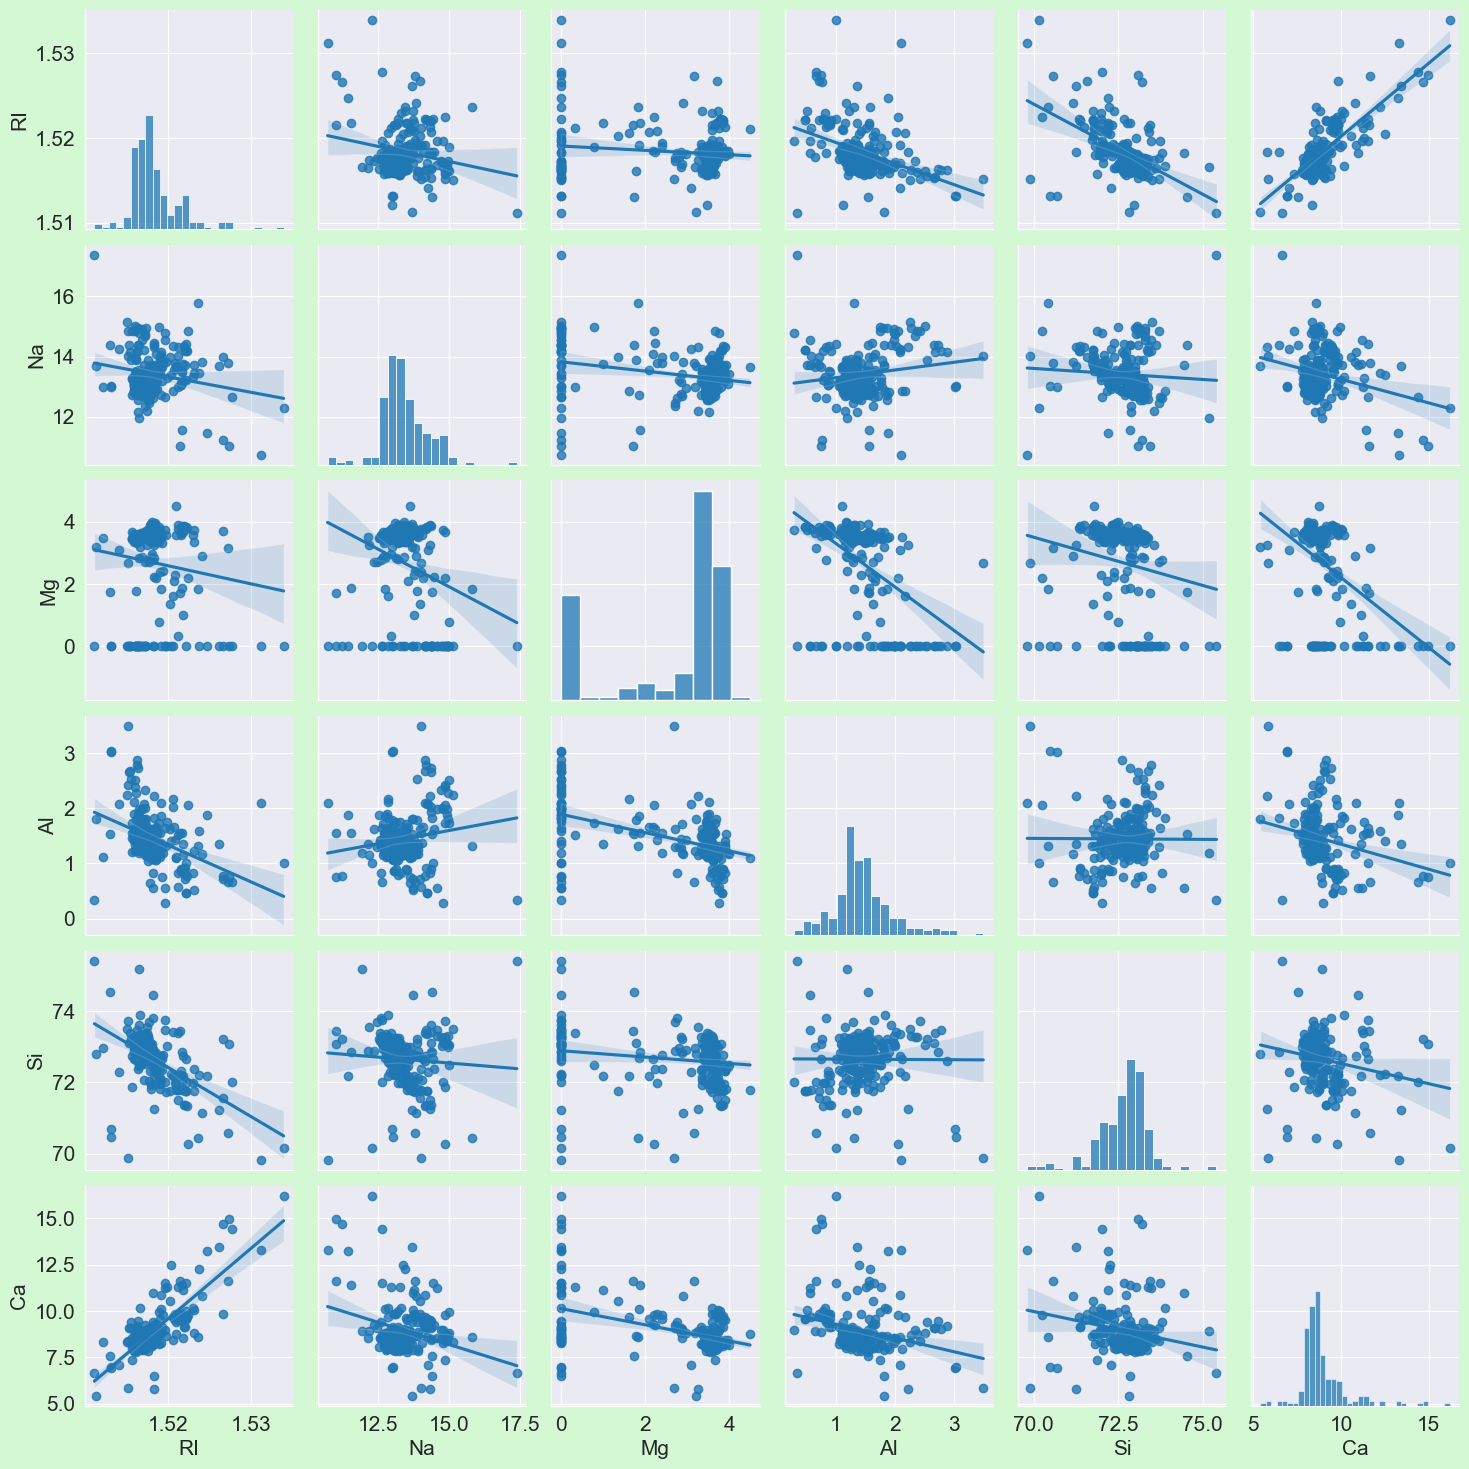

In [35]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(glass[['RI','Na','Mg','Al','Si','Ca']], kind='reg')

On most dimensions, the points are scattered. But it is clear that there is a significant relationship between calcium and refractive index. Silica and RI seem to be at odds with one another.

Types 1, 2, and 3 share a variety of traits. However, by determining whether or not they are flat, we can distinguish between them. In essence, the float technique flattens the glass into sheets. Let's look at some of the characteristics' density maps for flat and non-flat glass.

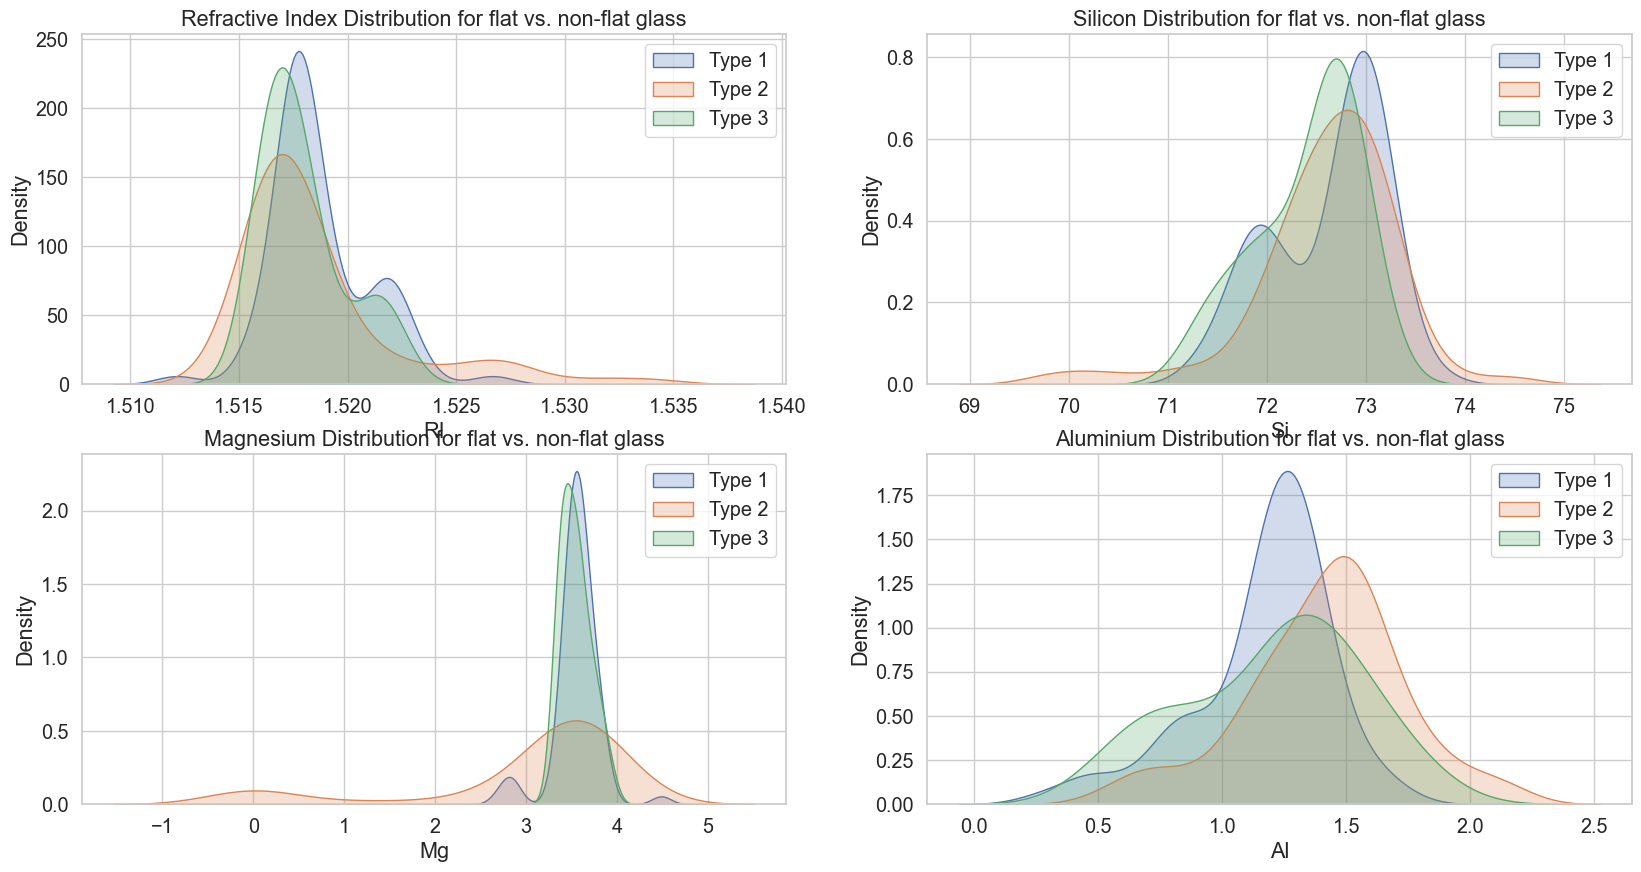

In [36]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(glass["RI"][glass.Type_Glass == 1], shade = True)
sns.kdeplot(glass["RI"][glass.Type_Glass == 2], shade = True)
sns.kdeplot(glass["RI"][glass.Type_Glass == 3], shade = True)
plt.title("Refractive Index Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,2)
sns.kdeplot(glass["Si"][glass.Type_Glass == 1], shade = True)
sns.kdeplot(glass["Si"][glass.Type_Glass == 2], shade = True)
sns.kdeplot(glass["Si"][glass.Type_Glass == 3], shade = True)
plt.title("Silicon Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,3)
sns.kdeplot(glass["Mg"][glass.Type_Glass == 1], shade = True)
sns.kdeplot(glass["Mg"][glass.Type_Glass == 2], shade = True)
sns.kdeplot(glass["Mg"][glass.Type_Glass == 3], shade = True)
plt.title("Magnesium Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,4)
sns.kdeplot(glass["Al"][glass.Type_Glass == 1], shade = True)
sns.kdeplot(glass["Al"][glass.Type_Glass == 2], shade = True)
sns.kdeplot(glass["Al"][glass.Type_Glass == 3], shade = True)
plt.title("Aluminium Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])

Each of the flat ones (1,3) overlaps the other, with the exception of Aluminium. Compared to Type 1 aluminium, Type 3 aluminium has a wider range. Due to the various extreme points, the non-float glass, type 2, has an extremely broad range. 

### Let's FIndout the CORRELATION among the data set

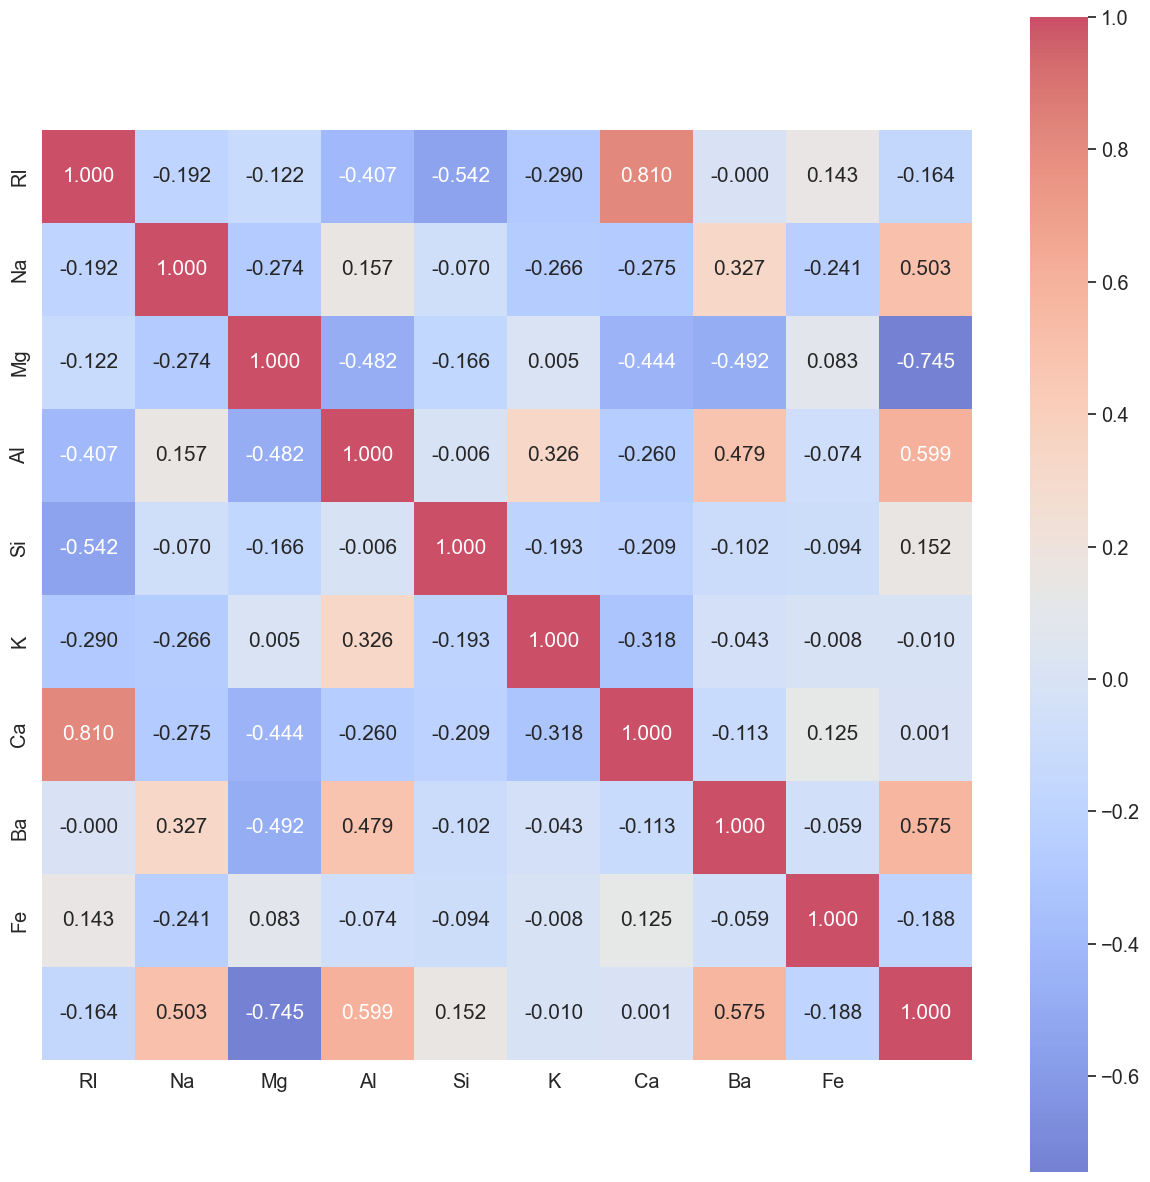

In [37]:
cor= glass.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, cbar=True, square=True, annot=True, fmt='.3f', annot_kws={'size': 15}, xticklabels=features, yticklabels=features, alpha=0.7, cmap= 'coolwarm')
plt.show()



1. The correlation between AI and Ba is moderate.
2. RI and Ca have a strong relationship. The need to run a PCA to decorrelate any of the input features may be indicated by this (if so).

The pairplot shows that Si and RI have a negative connection while RI and Ca have a large positive correlation. We can't just eliminate the collinear variables from the model because this is a classification method rather than a regression one and they could be able to explain the variation in the target labels. 

Let's examine the effective technique of principal component analysis to select the candidate variables. This is beneficial since it can aid in dimension reduction and reduce data collection costs.

Text(0, 0.5, 'Aluminium')

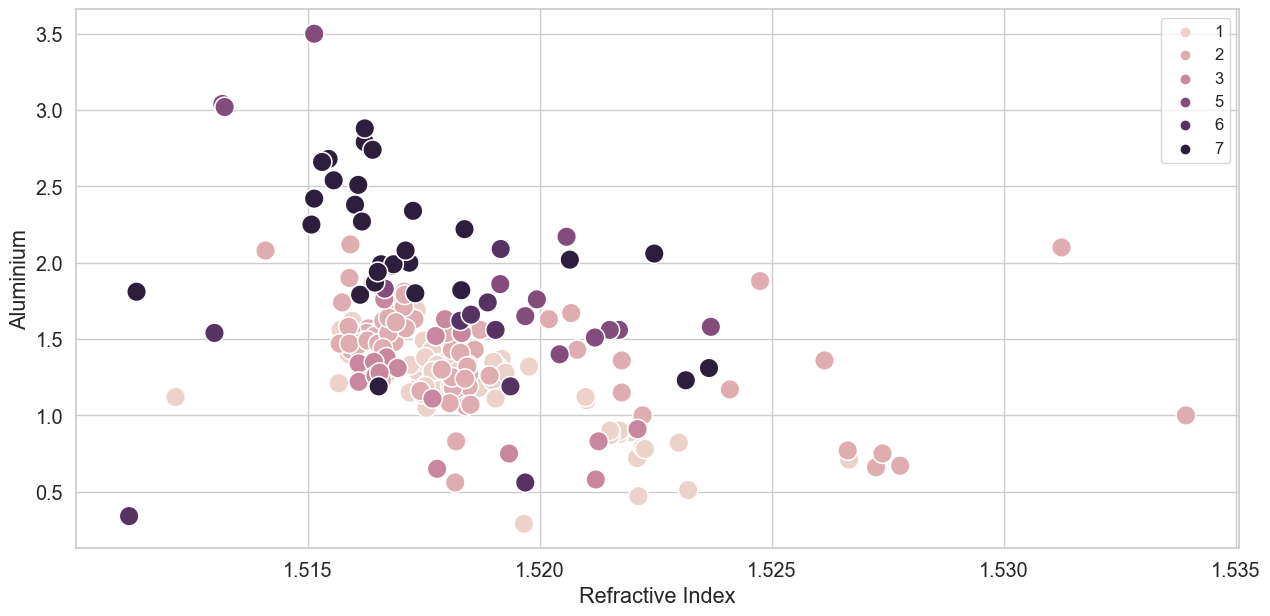

In [38]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=glass.RI, y=glass.Al, hue=glass.Type_Glass, s=200)
plt.legend(loc = 'upper right', fontsize=12)
plt.xlabel('Refractive Index')
plt.ylabel('Aluminium')

Text(0, 0.5, 'Sodium')

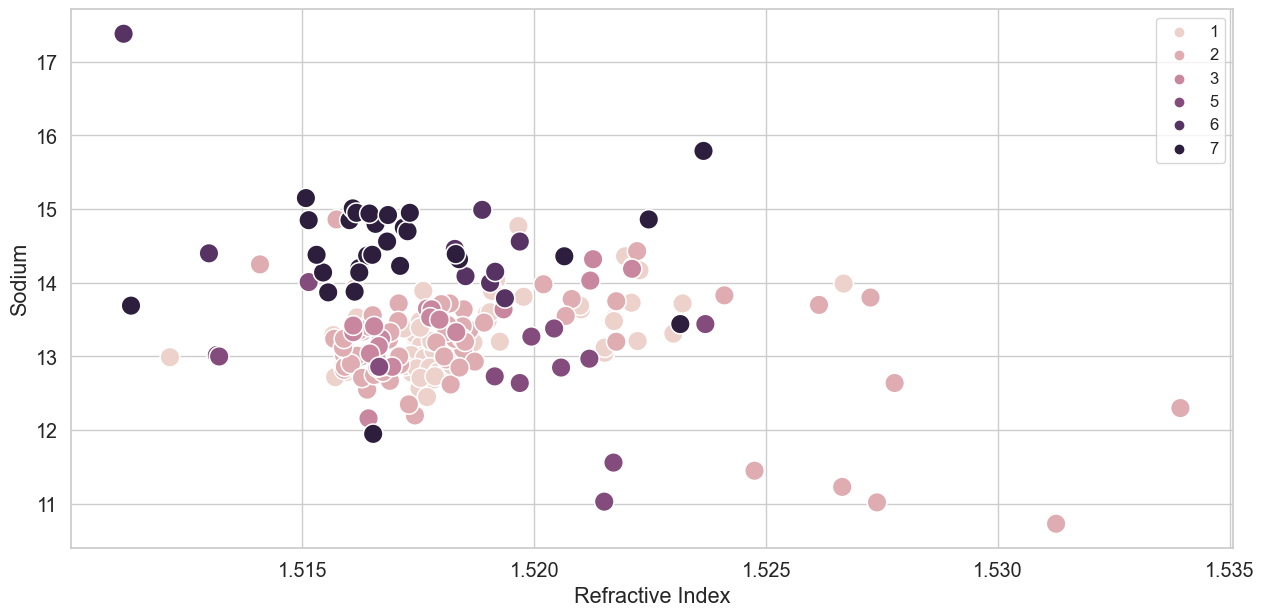

In [39]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=glass.RI, y=glass.Na, hue=glass.Type_Glass, s=200)
plt.legend(loc = 'upper right', fontsize=12)
plt.xlabel('Refractive Index')
plt.ylabel('Sodium')

Text(0, 0.5, 'Magnesium')

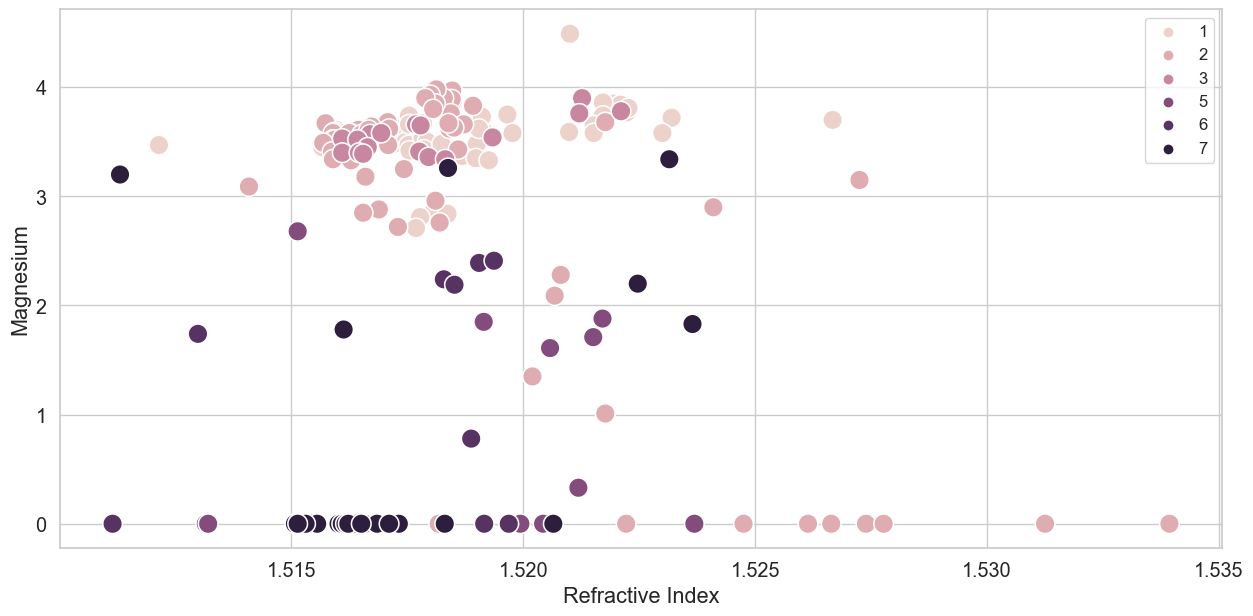

In [40]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=glass.RI, y=glass.Mg, hue=glass.Type_Glass, s=200)
plt.legend(loc = 'upper right', fontsize=12)
plt.xlabel('Refractive Index')
plt.ylabel('Magnesium')

Text(0, 0.5, 'Silicon')

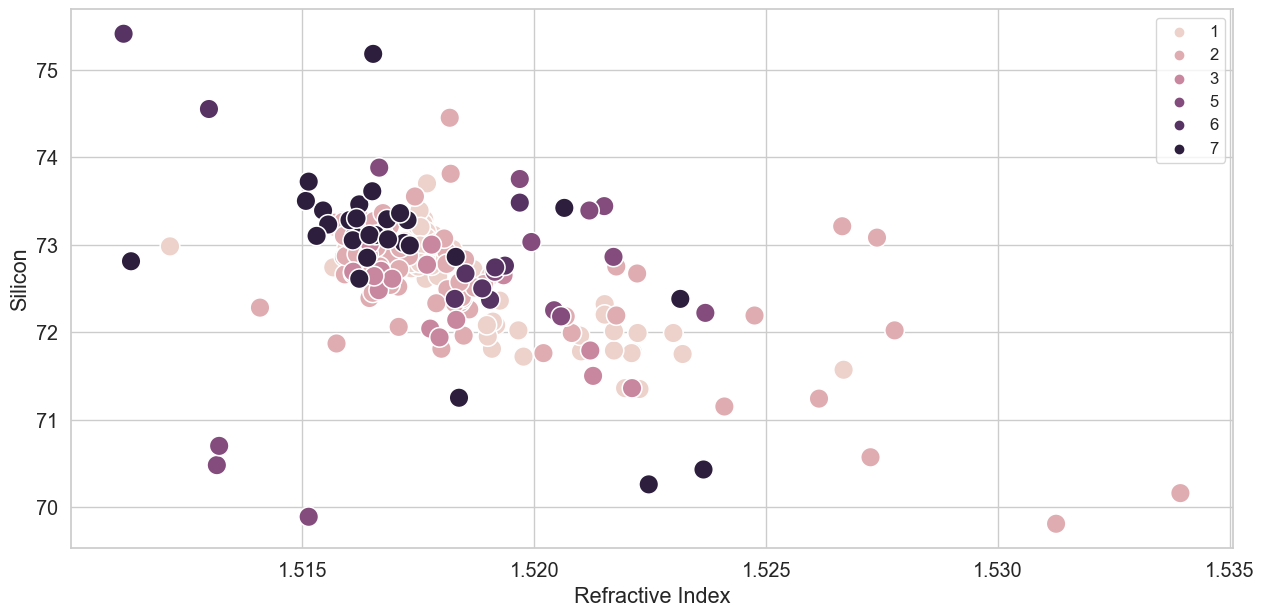

In [41]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=glass.RI, y=glass.Si, hue=glass.Type_Glass, s=200)
plt.legend(loc = 'upper right', fontsize=12)
plt.xlabel('Refractive Index')
plt.ylabel('Silicon')

Text(0, 0.5, 'Potassium')

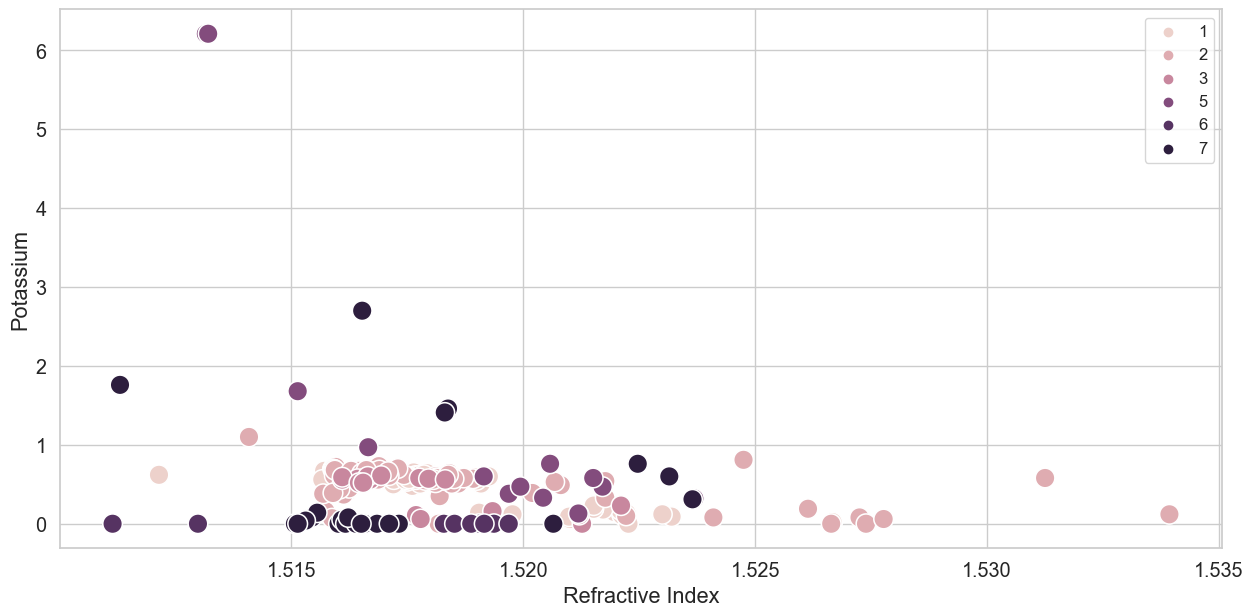

In [42]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=glass.RI, y=glass.K, hue=glass.Type_Glass, s=200)
plt.legend(loc = 'upper right', fontsize=12)
plt.xlabel('Refractive Index')
plt.ylabel('Potassium')

Text(0, 0.5, 'Calcium')

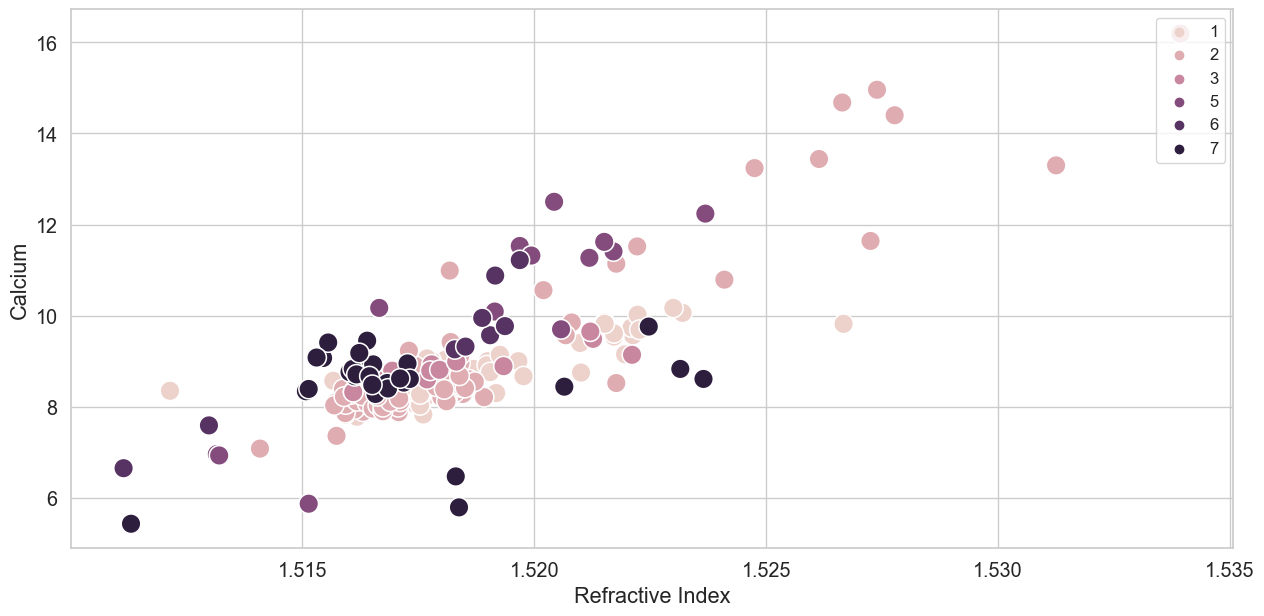

In [43]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=glass.RI, y=glass.Ca, hue=glass.Type_Glass, s=200)
plt.legend(loc = 'upper right', fontsize=12)
plt.xlabel('Refractive Index')
plt.ylabel('Calcium')

Text(0, 0.5, 'Barium')

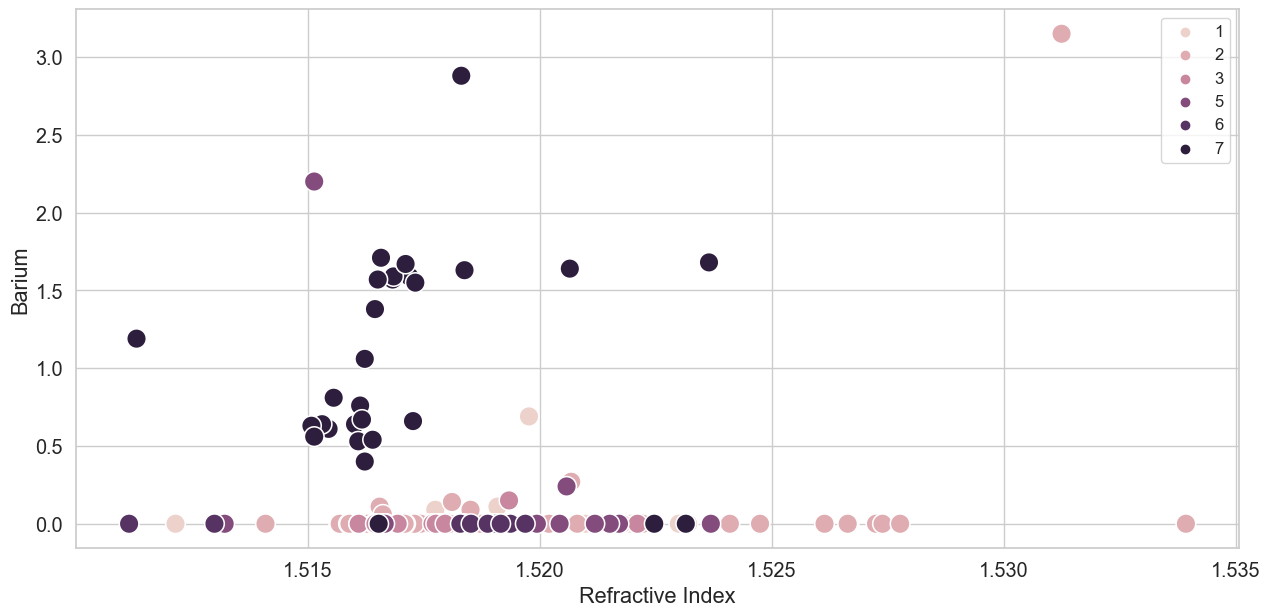

In [44]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=glass.RI, y=glass.Ba, hue=glass.Type_Glass, s=200)
plt.legend(loc = 'upper right', fontsize=12)
plt.xlabel('Refractive Index')
plt.ylabel('Barium')

Text(0, 0.5, 'Iron')

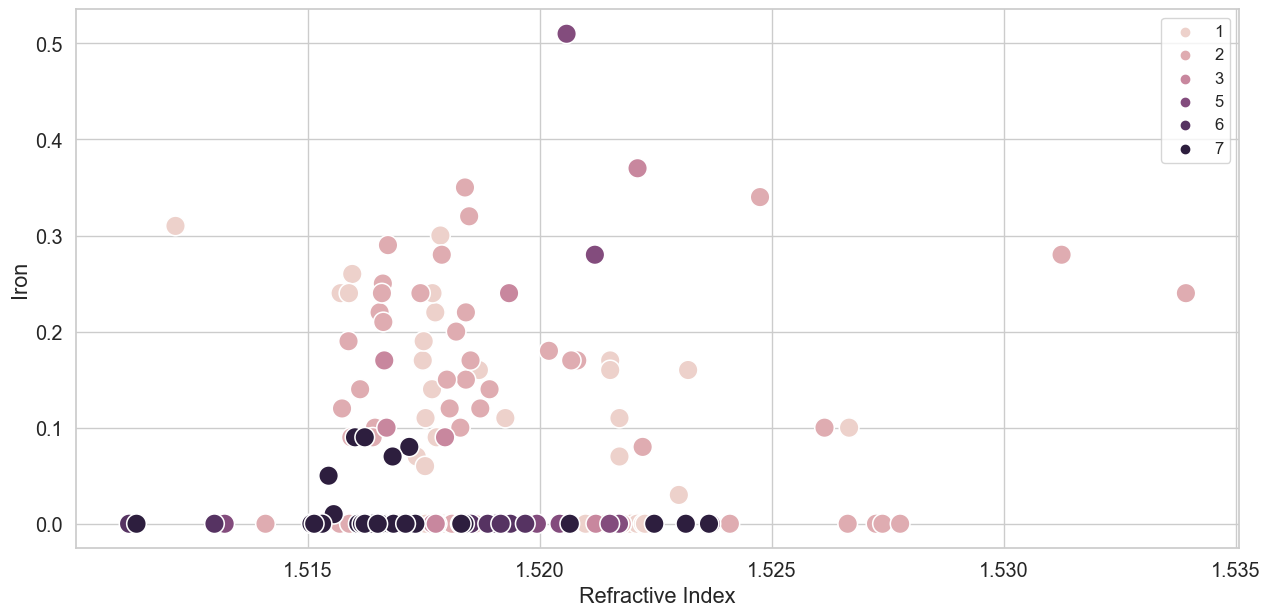

In [45]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=glass.RI, y=glass.Fe, hue=glass.Type_Glass, s=200)
plt.legend(loc = 'upper right', fontsize=12)
plt.xlabel('Refractive Index')
plt.ylabel('Iron')

The Above all Scatterplots are showing the variation of different Glass Types with respect to the variation of Refractive Index with reference to the change in all other chemical compositions

### Let's Go For Detecting OUTLIERS

In [46]:
# Detect observations with more than one outlier
import numpy as np
from collections import Counter
def outlier_hunt(glass):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []   
    for col in glass.columns.tolist():
        Q1 = np.percentile(glass[col], 25)
        Q3 = np.percentile(glass[col],75)      
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = glass[(glass[col] < Q1 - outlier_step) | (glass[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )    
    return multiple_outliers   
print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(glass[features]))))   

The dataset contains 14 observations with more than 2 outliers


**Outcomes** 

1. There are 14 observations with multiple outliers in our data, on average.
2. These might reduce how effectively our learning algorithms work. Now we'll get rid of them.

### We Can Check the Outliers with the help of BOX PLOTS also

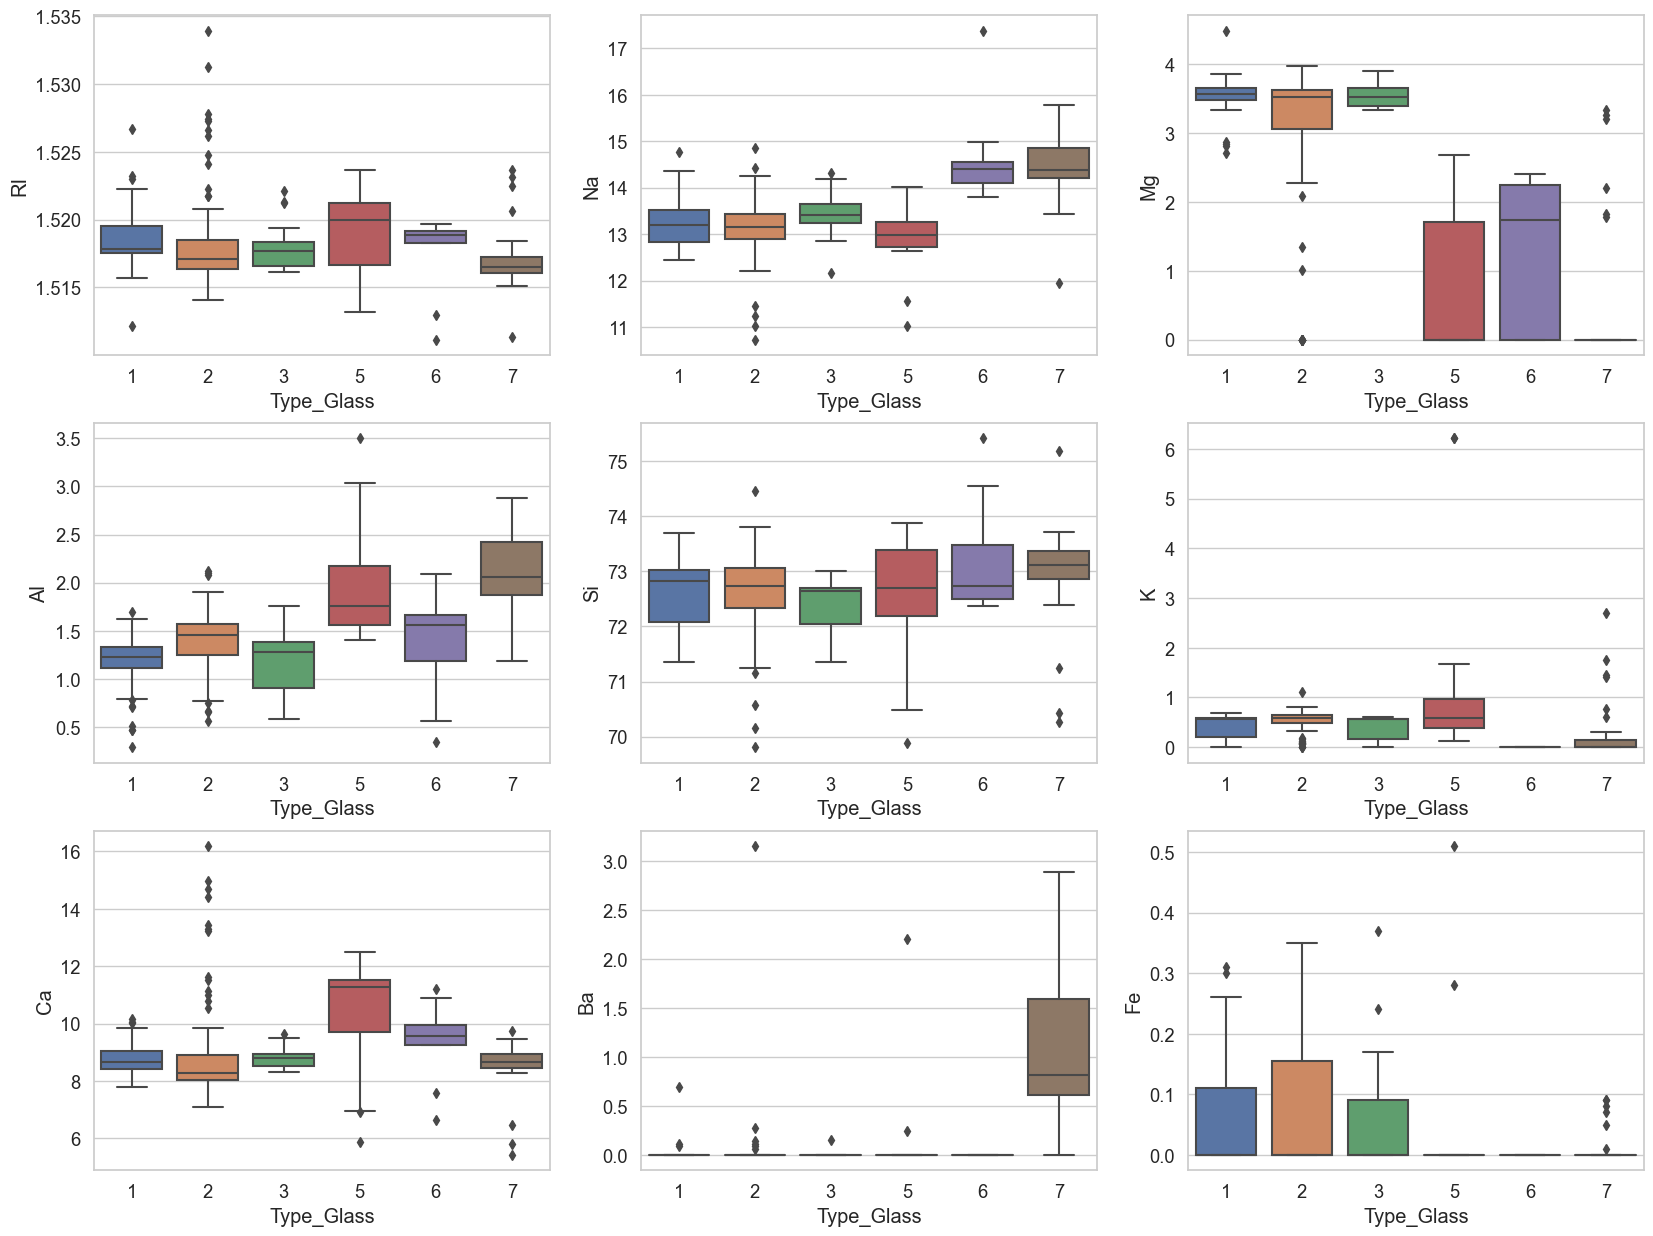

In [47]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type_Glass', y='RI', data=glass)
plt.subplot(3,3,2)
sns.boxplot(x='Type_Glass', y='Na', data=glass)
plt.subplot(3,3,3)
sns.boxplot(x='Type_Glass', y='Mg', data=glass)
plt.subplot(3,3,4)
sns.boxplot(x='Type_Glass', y='Al', data=glass)
plt.subplot(3,3,5)
sns.boxplot(x='Type_Glass', y='Si', data=glass)
plt.subplot(3,3,6)
sns.boxplot(x='Type_Glass', y='K', data=glass)
plt.subplot(3,3,7)
sns.boxplot(x='Type_Glass', y='Ca', data=glass)
plt.subplot(3,3,8)
sns.boxplot(x='Type_Glass', y='Ba', data=glass)
plt.subplot(3,3,9)
sns.boxplot(x='Type_Glass', y='Fe', data=glass)
plt.show()

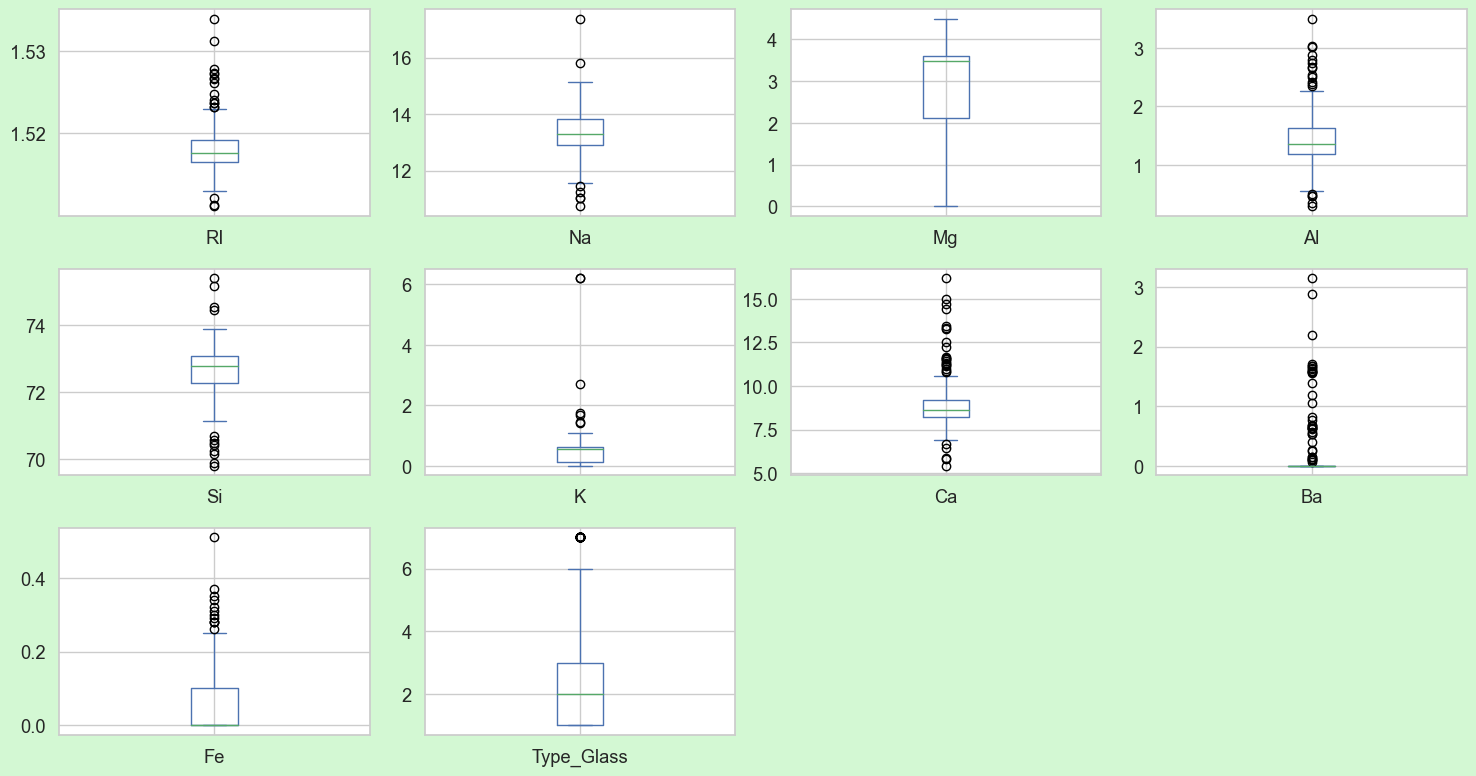

In [48]:
#Set Run time configuration figure size = (15,8)
plt.rcParams['figure.figsize']=(15,8)

#Set Run Time configuration parameters of back ground color in HEX 
plt.rcParams['figure.facecolor']='#D3F8D3'
glass.plot(kind ='box', subplots = True, layout=(3,4))
plt.tight_layout()


The box plot shows that the average Refractive index across all types is similar. 
    However, Type 5 has a wider range and a little higher mean. 
    While Types 1 through 3 have relatively high magnesium contents, Types 6 and 7 have elevated sodium levels. 
    Types 5 and 7 have more aluminium than usual. 
    Despite having the highest concentration of any mineral and a wide range for all kinds, silica does not provide much information on distinction. 
    
    Potassium also doesn't provide much information. However, K is higher in type 5 containers since it is utilised in toughened glass, which is used to make pyrex products. 
    Calcium levels are higher in type 5 and barium levels are highest in type 7. Contrary to popular belief, iron is not only found in

    We have a better understanding of the characteristics that help distinguish one type from another. Let's now examine each of their relationships using a pairplot. (Due to their low concentration, K, Ba, and Fe will be omitted.)

                     E1    E2    E3    E4    E5   E6    E7   E8   E9
Presented_Variance  3.0  1.66  0.68  0.64  0.21  0.1  0.01  0.0  0.0


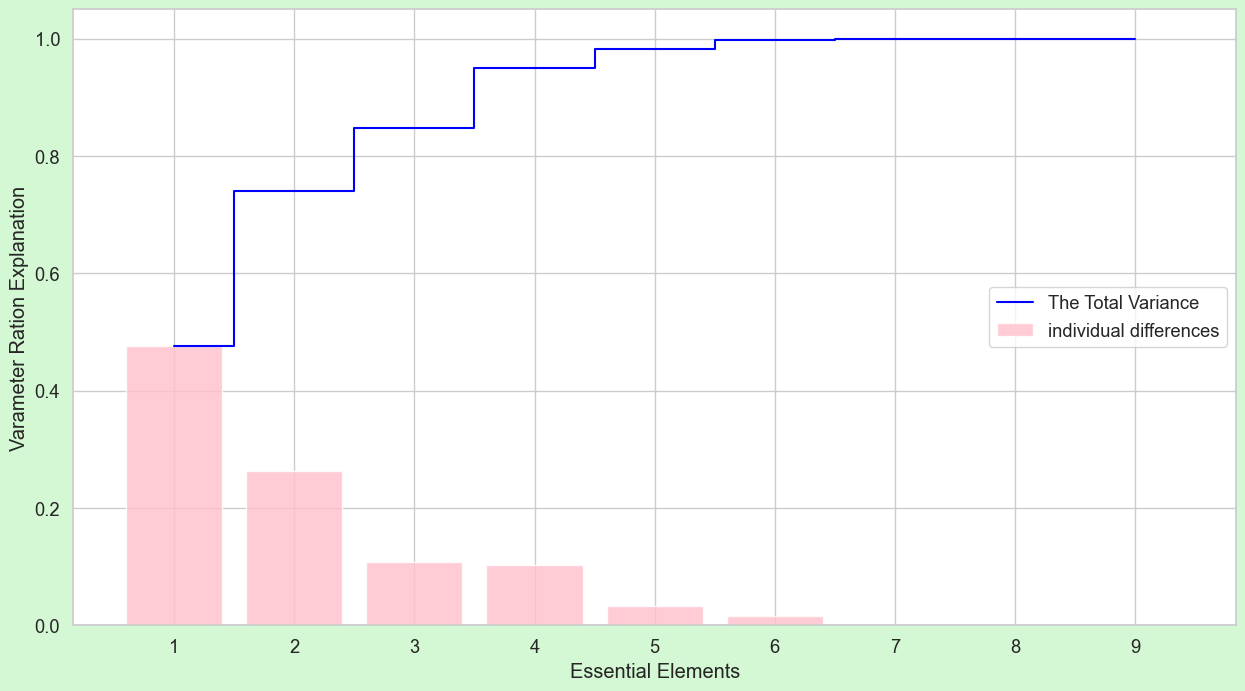

In [49]:
from sklearn.decomposition import PCA
# Performing PCA
X_variables = glass[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_variables)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["E" + str(i) for i in range(1,10)],
                      columns=["Presented_Variance"])
print(var_df.T)
plt.figure(figsize=(15,8))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual differences', color='pink', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'The Total Variance', color='blue')
plt.ylabel('Varameter Ration Explanation')
plt.xlabel('Essential Elements')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

A little more than 99% of the total explained variance is explained by the first 5 components. We can only rerun the analysis using these five elements.

In [50]:
pca_red = PCA(n_components=5)
X_red = pca_red.fit_transform(X_variables)

Let's move on to model development now that we have our characteristics and target labels.

## Development of the Model

In [51]:
# For data science and machine learning techniques
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# To create the interactive components
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [52]:
# Distinguishing the explanatory (x) and response (y) variables
X = X_red
y = glass["Type_Glass"].values

In [53]:
# Using 70% of the sample for model training and the remaining 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

# Verify that all glass kinds are represented in the train and test.
print(np.unique(y_train))
print(np.unique(y_test))

[1 2 3 5 6 7]
[1 2 3 5 6 7]


### Testing potential models

In [54]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc1 = metrics.accuracy_score(y_pred,y_test)
 

# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred = gbmMod.predict(X_test)
sc2 = metrics.accuracy_score(y_pred,y_test)

# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
sc3 = metrics.accuracy_score(y_pred,y_test)

# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
sc4 = metrics.accuracy_score(y_pred,y_test)

In [55]:
print(DecTree.feature_importances_)
print(RandFor.feature_importances_)
print(gbmMod.feature_importances_)

[0.20104206 0.34188222 0.18504003 0.22868936 0.04334632]
[0.31377335 0.32296928 0.05489302 0.21178263 0.09658172]
[0.3352154  0.28779865 0.13393196 0.17160844 0.07144555]


In [56]:
# Compare accuracy of models
pd.DataFrame([['Support Vector Machine',sc1],['Gradient Boost',sc2],
                             ['Decision Tree',sc3],['Random Forest',sc4]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.753846
1,Gradient Boost,0.676923
2,Decision Tree,0.692308
3,Random Forest,0.738462


The maximum accuracy is provided by SVM, and all of the features from the other models appear to be significant. As a result, SVM will remain our chosen model, and hyperparameter adjustment will be used to enhance it.

## Hyperparameter Tuning

In [57]:
tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10],
                     'C': [0.001, 0.01, 0.1, 1, 10]}]
grid = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(grid.best_params_)

Best parameters set found on development set:

{'C': 10, 'gamma': 10, 'kernel': 'rbf'}


## Operating the Final Model

In [58]:
model = grid.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.6923076923076923

## Model Performance

Text(270.25, 0.5, 'anticipated label')

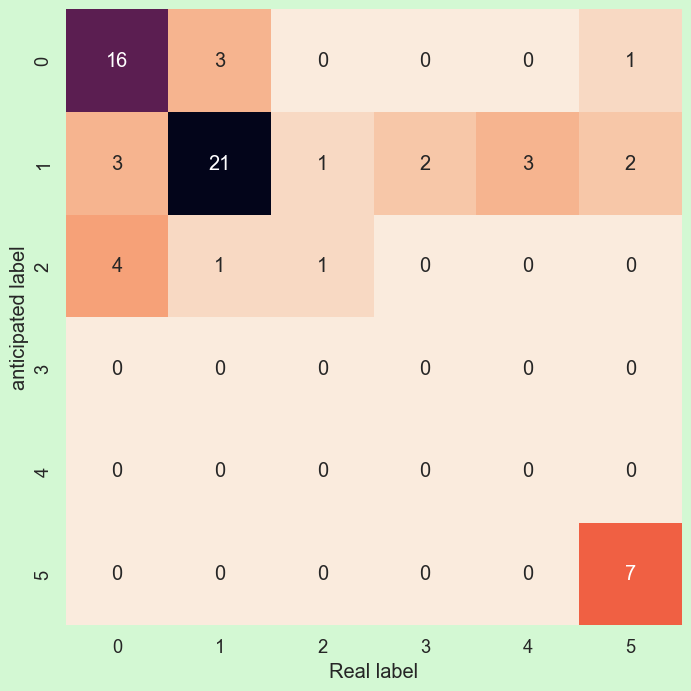

In [59]:
# Now, visualise the confusion matrix.
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='rocket_r')
plt.xlabel('Real label')
plt.ylabel('anticipated label')

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.70      0.74        23
           2       0.66      0.84      0.74        25
           3       0.17      0.50      0.25         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       1.00      0.70      0.82        10

    accuracy                           0.69        65
   macro avg       0.44      0.46      0.43        65
weighted avg       0.69      0.69      0.68        65



At this point, I provide an **interactive component that allows the user to experiment with the model**. The first stage is to retrain the model using the complete dataset, the top-performing model, and the above-mentioned parameters. The user is then shown interactive sliders with ranges that are appropriate for the distribution of the original dataset. The output is displayed below the sliders and represents the final anticipated class of the glass. To determine which kind it belongs to, the user can look at the table above the sliders.

In [61]:
# Given that cross-validation has already been done, train the model using the whole set of data.
svm_mod = SVC(C=10, gamma=0.1, kernel='rbf')
svm_mod.fit(X_variables.iloc[:,0:5],y)

SVC(C=10, gamma=0.1)

In [62]:
# When the slider values are modified, this function will be called.
from IPython.display import display
def f(RI, Na, Mg, Al, Si):
    y_val = svm_mod.predict([[RI,Na,Mg,Al,Si]])
    print("The Glass Type is {}".format(y_val))

In [63]:
# Modify the slider's values.
interact(f, RI=(1.50,1.54,0.0001),Na=(10.7,17.4),Mg=(0,4.5),Al=(0,3.5),Si=(69,76))

interactive(children=(FloatSlider(value=1.52, description='RI', max=1.54, min=1.5, step=0.0001), FloatSlider(v…

<function __main__.f(RI, Na, Mg, Al, Si)>

## Reference Scale for the Type of Glass

    1- building_windows_float_processed
    2- building_windows_non_float_processed
    3- vehicle_windows_float_processed
    4- vehicle_windows_non_float_processed (none in this database)
    5- containers
    6- tableware
    7- headlamps


# Thank You